# READ ME

This Jupyter notebook provides data analysis and visualization for the generated synthetic signals, added noise, and real Binary Black Hole (BBH), Binary Neutron Star (BNS), and Neutron Star-Black Hole (NSBH) signals.

In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import norm

from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import h5py
from scipy.signal import butter, filtfilt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import h5py
from pycbc import distributions
from pycbc.waveform import get_td_waveform, td_approximants
from pycbc.detector import Detector
import matplotlib.pyplot as plt
import numpy as np
import gwpy
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
import pycbc.noise
import pycbc.psd
from pycbc.filter import matched_filter
from scipy.signal import butter, filtfilt


## GENERATED DATA (w random parameters)

In [3]:
bbh_data = pd.read_csv('/Users/aycayk/Desktop/myz_project/myz/data/1000_example/BBH_1000_4K.csv')
bns_data = pd.read_csv('/Users/aycayk/Desktop/myz_project/myz/data/1000_example/BNS_1000_4K.csv')
nsbh_data = pd.read_csv('/Users/aycayk/Desktop/myz_project/myz/data/1000_example/NSBH_1000_4K.csv')

In [10]:
bbh_data.tail()

L1_0  L1_1  L1_2  L1_3  L1_4  L1_5  L1_6  L1_7  L1_8  L1_9  ...  \
995   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
996   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
997   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
998   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
999   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

     L1_131063  L1_131064  L1_131065  L1_131066  L1_131067  L1_131068  \
995 -10.759792  -10.85823 -10.945764 -11.022287 -11.087708 -11.141943   
996   0.000000    0.00000   0.000000   0.000000   0.000000   0.000000   
997   0.000000    0.00000   0.000000   0.000000   0.000000   0.000000   
998   0.000000    0.00000   0.000000   0.000000   0.000000   0.000000   
999  13.951278   14.01746  14.068208  14.103454  14.123144  14.127242   

     L1_131069  L1_131070  L1_131071  label  
995 -11.184923 -11.216586 -11.236886      0  
996   0.000000   0.000000   0.000000      0  
997   0.000000   0.000000   0.000000      0  
998   0.000000   0.000000   0.000000      0  
999  14.115728  14.088603  14.045881      0  

[5 rows x 131073 columns]

In [5]:
bns_data.shape
bns_data.shape
nsbh_data.shape

(1000, 131073)

In [6]:
bns_data.head()

L1_0      L1_1      L1_2      L1_3      L1_4      L1_5      L1_6  \
0 -0.045258 -0.047824 -0.050201 -0.052354 -0.054301 -0.056005 -0.057487   
1 -0.003312 -0.004254 -0.005180 -0.006087 -0.006972 -0.007833 -0.008665   
2 -0.129017 -0.136961 -0.144463 -0.151532 -0.158113 -0.164220 -0.169799   
3 -0.073447 -0.073040 -0.072405 -0.071545 -0.070463 -0.069162 -0.067645   
4 -0.052902 -0.053543 -0.053990 -0.054259 -0.054332 -0.054225 -0.053922   

       L1_7      L1_8      L1_9  ...  L1_131063  L1_131064  L1_131065  \
0 -0.058714 -0.059707 -0.060436  ...  -0.125306  -0.187208  -0.212352   
1 -0.009465 -0.010231 -0.010961  ...   0.000000   0.000000   0.000000   
2 -0.174867 -0.179374 -0.183341  ...  -0.541419  -0.470747  -0.359498   
3 -0.065918 -0.063986 -0.061855  ...  -0.087052  -0.032275   0.024981   
4 -0.053441 -0.052766 -0.051918  ...  -0.198778  -0.295427  -0.209970   

   L1_131066  L1_131067  L1_131068  L1_131069  L1_131070  L1_131071  label  
0  -0.195306  -0.139740  -0.056213   0.038373   0.125628   0.187801      1  
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000      1  
2  -0.218981  -0.058980   0.105065   0.261356   0.394722   0.495913      1  
3   0.080363   0.129652   0.169089   0.195662   0.207334   0.203201      1  
4  -0.011157   0.206066   0.291710   0.214297  -0.003272  -0.209450      1  

[5 rows x 131073 columns]

In [7]:
nsbh_data.head()

L1_0      L1_1      L1_2      L1_3      L1_4      L1_5      L1_6  \
0 -0.040690 -0.040551 -0.040364 -0.040131 -0.039853 -0.039527 -0.039157   
1 -0.046601 -0.043142 -0.039637 -0.036090 -0.032504 -0.028885 -0.025235   
2 -0.004760 -0.003904 -0.003044 -0.002181 -0.001316 -0.000450  0.000417   
3  0.025845  0.027164  0.028452  0.029709  0.030933  0.032122  0.033275   
4  0.054375  0.054063  0.053689  0.053252  0.052753  0.052193  0.051572   

       L1_7      L1_8      L1_9  ...  L1_131063  L1_131064  L1_131065  \
0 -0.038741 -0.038281 -0.037776  ...   0.000221  -0.000124   0.000101   
1 -0.021558 -0.017858 -0.014140  ...   0.300855   0.270546   0.232435   
2  0.001283  0.002148  0.003011  ...   0.000000   0.000000   0.000000   
3  0.034392  0.035469  0.036508  ...   0.010670   0.036751   0.061589   
4  0.050890  0.050150  0.049351  ...   0.000000   0.000000   0.000000   

   L1_131066  L1_131067  L1_131068  L1_131069  L1_131070  L1_131071  label  
0  -0.000176  -0.000032  -0.000120  -0.000020  -0.000040   0.000000      2  
1   0.187569   0.137283   0.082976   0.026261  -0.031271  -0.087908      2  
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000      2  
3   0.084301   0.104122   0.120338   0.132405   0.139879   0.142516      2  
4   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000      2  

[5 rows x 131073 columns]

In [17]:
bbh_data_ = bbh_data.drop(columns=['label'], errors='ignore')
bns_data_ = bns_data.drop(columns=['label'], errors='ignore')
nsbh_data_ = nsbh_data.drop(columns=['label'], errors='ignore')


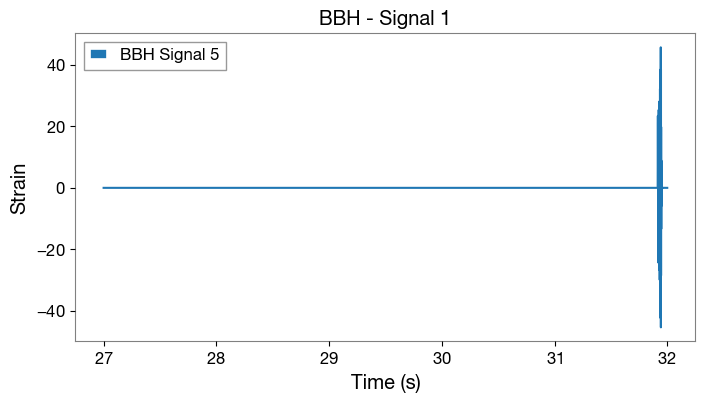

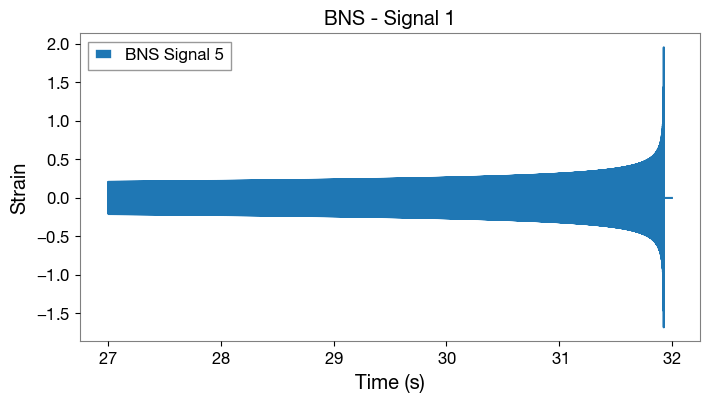

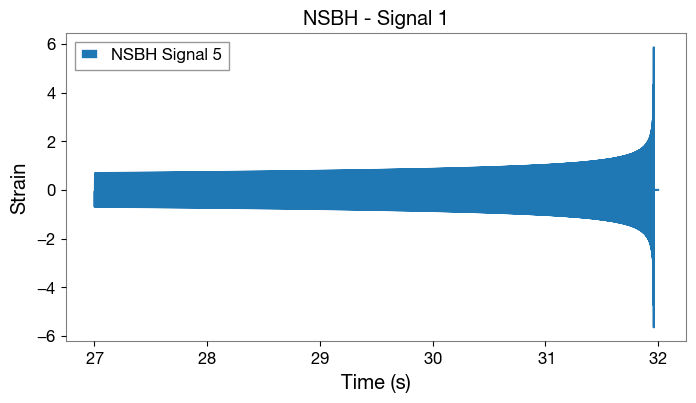

In [49]:
sampling_frequency = 4096 
duration = 32 
time = np.linspace(27, duration, sampling_frequency * duration)

datasets = {'BBH': bbh_data_, 'BNS': bns_data_, 'NSBH': nsbh_data_}

for dataset_name, dataset in datasets.items():
    random_signals = dataset.head(1)
    
    for i, (_, signal) in enumerate(random_signals.iterrows()):
        
        plt.figure(figsize=(8, 4))
        plt.plot(time, signal.values, label=f"{dataset_name} Signal {i + 5}")
        plt.xlabel("Time (s)")
        plt.ylabel("Strain")
        plt.title(f"{dataset_name} - Signal {i + 1}")
        plt.legend()
        plt.grid()
        plt.show()

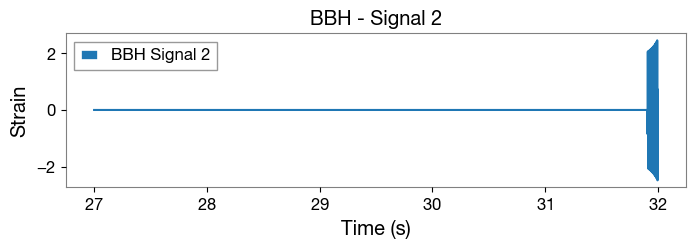

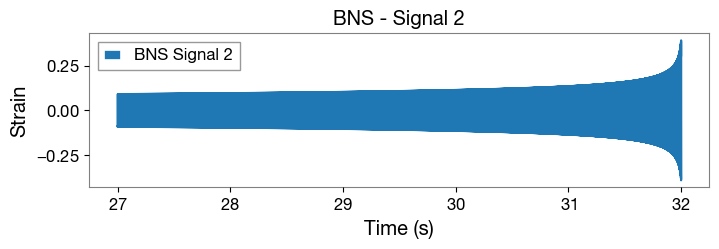

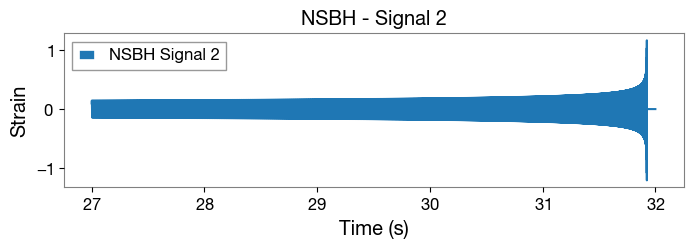

In [60]:
sampling_frequency = 4096 
duration = 32 
time = np.linspace(27, duration, sampling_frequency * duration)

datasets = {'BBH': bbh_data_, 'BNS': bns_data_, 'NSBH': nsbh_data_}

# Adjust to select the 6th signal
for dataset_name, dataset in datasets.items():
    signal_index = 1  # Index for the 6th signal (0-based indexing)
    signal = dataset.iloc[signal_index]  # Select the 6th signal
    
    # Plot the 6th signal
    plt.figure(figsize=(8, 2))
    plt.plot(time, signal.values, label=f"{dataset_name} Signal {signal_index + 1}")
    plt.xlabel("Time (s)")
    plt.ylabel("Strain")
    plt.title(f"{dataset_name} - Signal {signal_index + 1}")
    plt.legend()
    plt.grid()
    plt.show()


## NORMALİZED SIGNAL


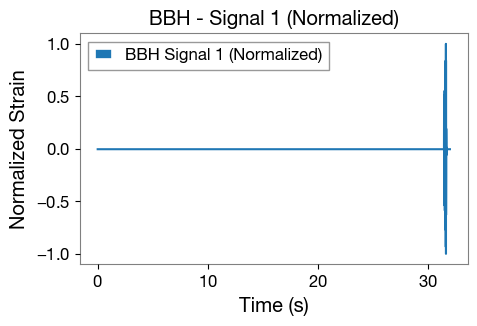

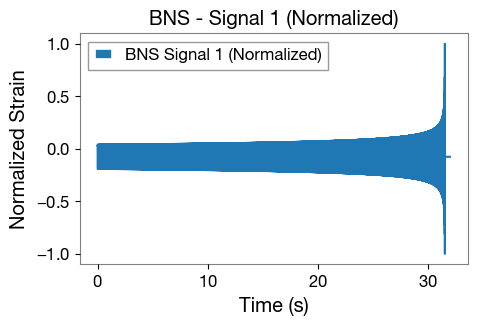

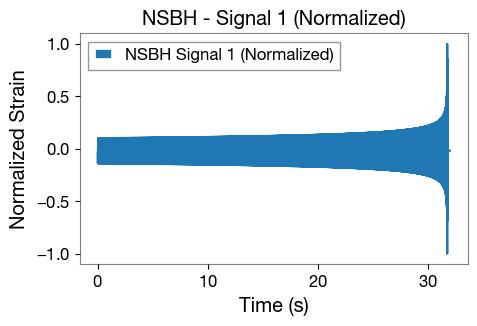

In [58]:
def normalize_to_real_world(signal, min_value=-1., max_value=1.):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    normalized_signal = (signal - signal_min) / (signal_max - signal_min)
    normalized_signal = normalized_signal * (max_value - min_value) + min_value
    return normalized_signal

sampling_frequency = 4096
duration = 32
time = np.linspace(0, duration, sampling_frequency * duration)

datasets = {'BBH': bbh_data_, 'BNS': bns_data_, 'NSBH': nsbh_data_}

for dataset_name, dataset in datasets.items():
    random_signals = dataset.head(1) 
    
    for i, (_, signal) in enumerate(random_signals.iterrows()):
        normalized_signal = normalize_to_real_world(signal.values)
        
        plt.figure(figsize=(5, 3))
        plt.plot(time, normalized_signal, label=f"{dataset_name} Signal {i + 1} (Normalized)")
        plt.xlabel("Time (s)")
        plt.ylabel("Normalized Strain")
        plt.title(f"{dataset_name} - Signal {i + 1} (Normalized)")
        plt.legend()
        plt.grid()
        plt.show()


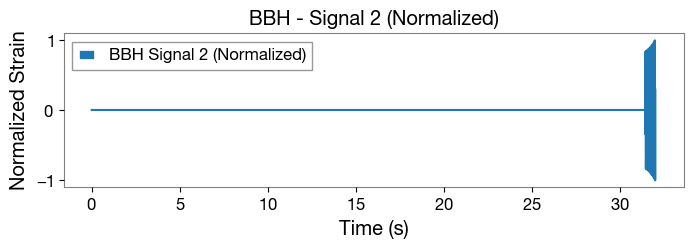

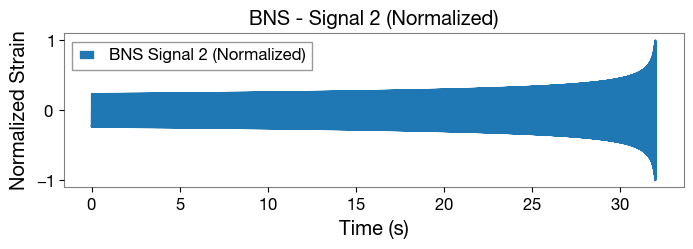

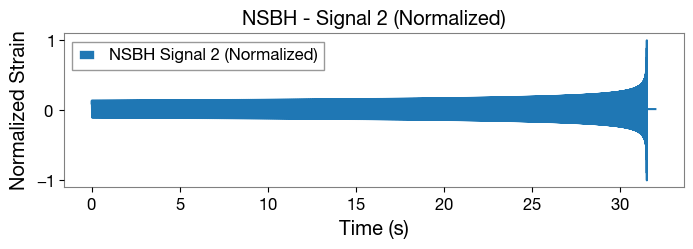

In [59]:
def normalize_to_real_world(signal, min_value=-1., max_value=1.):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    normalized_signal = (signal - signal_min) / (signal_max - signal_min)
    normalized_signal = normalized_signal * (max_value - min_value) + min_value
    return normalized_signal

sampling_frequency = 4096
duration = 32
time = np.linspace(0, duration, sampling_frequency * duration)

datasets = {'BBH': bbh_data_, 'BNS': bns_data_, 'NSBH': nsbh_data_}

for dataset_name, dataset in datasets.items():
    signal_index = 1  

    if signal_index < len(dataset):
        signal = dataset.iloc[signal_index]
        normalized_signal = normalize_to_real_world(signal.values)
        
        # Plot the 2nd signal
        plt.figure(figsize=(8, 2))
        plt.plot(time, normalized_signal, label=f"{dataset_name} Signal {signal_index + 1} (Normalized)")
        plt.xlabel("Time (s)")
        plt.ylabel("Normalized Strain")
        plt.title(f"{dataset_name} - Signal {signal_index + 1} (Normalized)")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print(f"{dataset_name} does not contain enough signals (at least {signal_index + 1}).")


## ADDING NOISE

signals: [[ 0.          0.          0.         ...  0.
   0.          0.        ]
 [ 0.          0.          0.         ...  0.
   0.          0.        ]
 [ 0.          0.          0.         ...  0.
   0.          0.        ]
 ...
 [ 0.          0.          0.         ...  0.
   0.          0.        ]
 [ 0.          0.          0.         ...  0.
   0.          0.        ]
 [ 0.          0.          0.         ... 14.11572845
  14.08860304 14.04588105]] - shape: (1000, 131072), type: <class 'numpy.ndarray'>
signal_example: [0. 0. 0. ... 0. 0. 0.] - shape: (131072,),  type: <class 'numpy.ndarray'> 


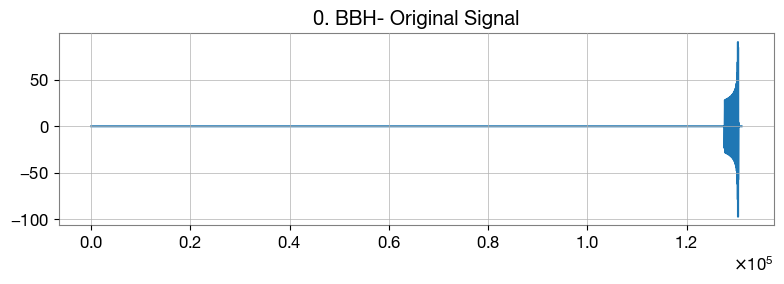

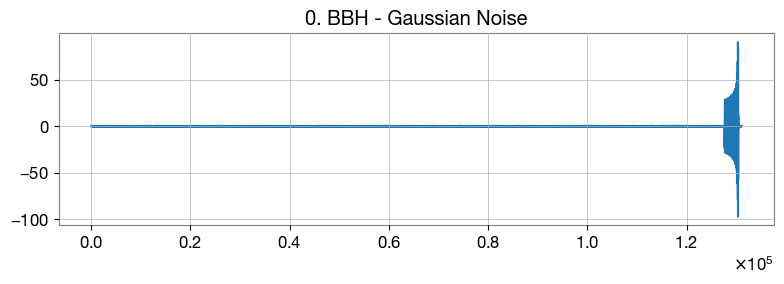

signal_example: [0. 0. 0. ... 0. 0. 0.] - shape: (131072,),  type: <class 'numpy.ndarray'> 


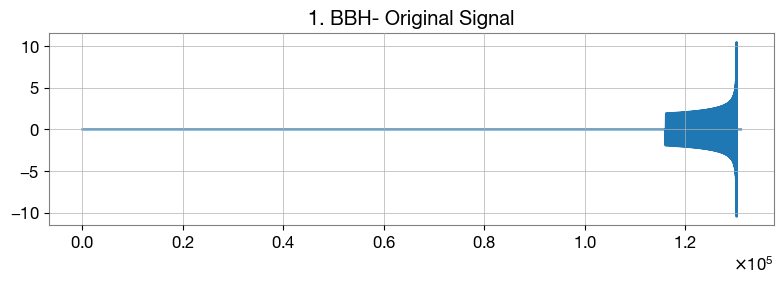

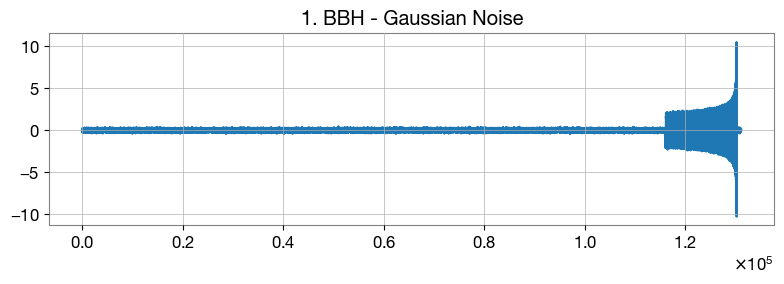

signal_example: [0. 0. 0. ... 0. 0. 0.] - shape: (131072,),  type: <class 'numpy.ndarray'> 


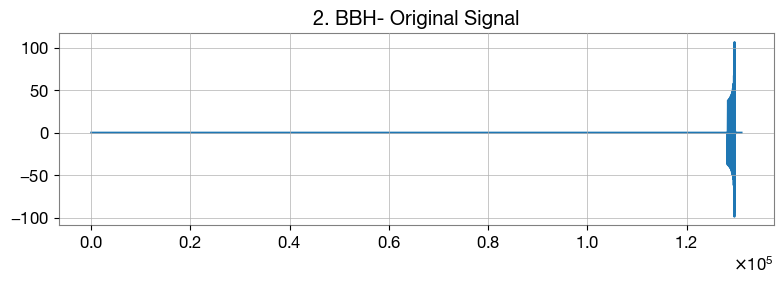

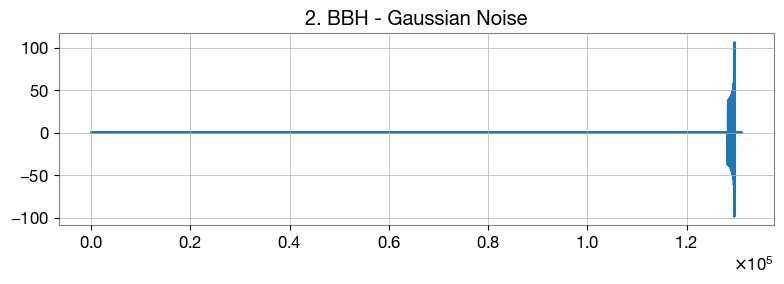

signal_example: [0. 0. 0. ... 0. 0. 0.] - shape: (131072,),  type: <class 'numpy.ndarray'> 


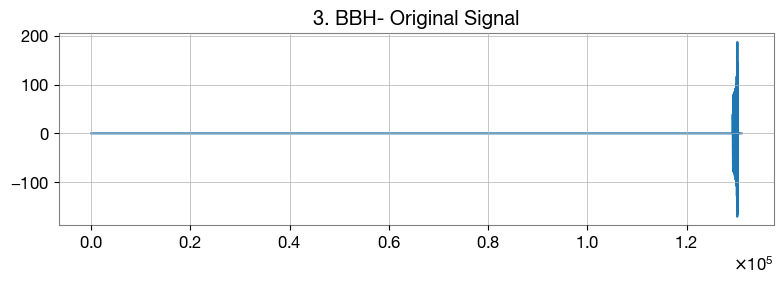

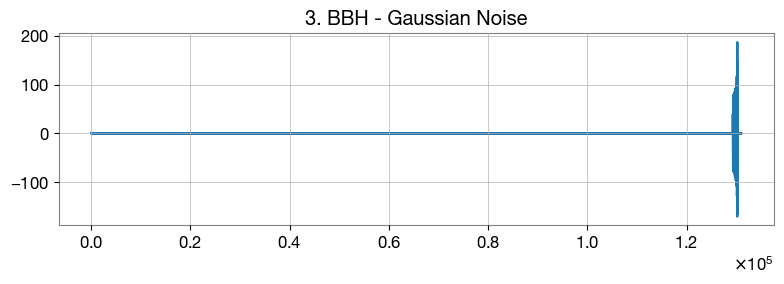

signal_example: [0. 0. 0. ... 0. 0. 0.] - shape: (131072,),  type: <class 'numpy.ndarray'> 


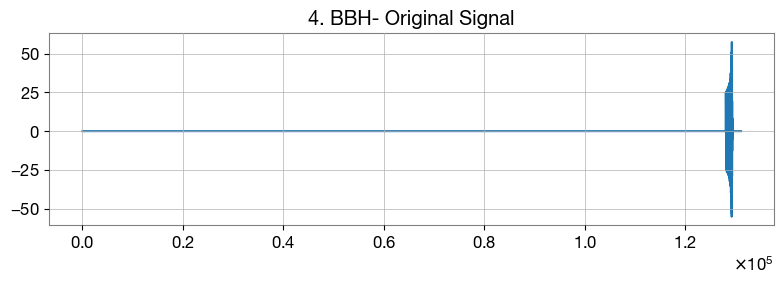

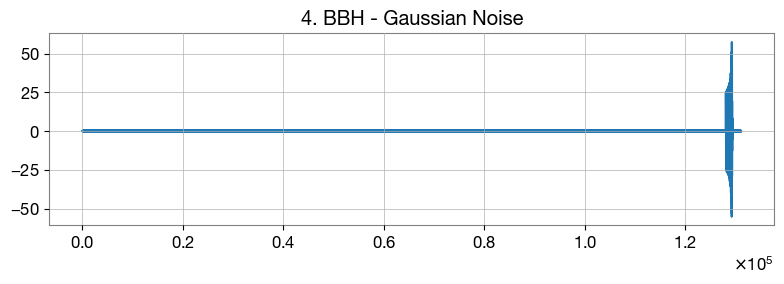

In [12]:
signal_sampling_frequency = 4096 
signal_duration = 32  


def plot_single_signal(signal, desc="Graviational Wave"):
    plt.plot(signal)
    plt.title(f"{desc}")
    plt.show()


def plot_signals(signals, labels):
    for signal, label in zip(signals, labels):
        plt.figure(figsize=(8, 3))  
        plt.plot(signal)
        plt.title(label)
        plt.grid(True)
        plt.tight_layout()
    plt.show()


def add_gauss_noise_to_signal(signal, flow=30.0, delta_f=1.0/16, delta_t=1.0/4096, duration=32):

    flow = 30.0
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    delta_t = 1.0 / 4096
    tsamples = int(duration / delta_t)
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd)

    noise *= 1e21
    noise *= 0.4
    noise = TimeSeries.from_pycbc(noise)

    if not isinstance(signal, TimeSeries):
        signal = TimeSeries(signal, sample_rate=1.0/delta_t)
    
    noise_signal = noise.inject(signal)    
        
    return noise_signal.value


def normalize_to_real_world(signal, min_value=-1., max_value=1.):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    normalized_signal = (signal - signal_min) / (signal_max - signal_min)  
    normalized_signal = normalized_signal * (max_value - min_value) + min_value  
    return normalized_signal


def main():
    bbh_dataset = pd.read_csv('/Users/aycayk/Desktop/myz/data/1000_example/BBH_1000_4K.csv')

    labels = bbh_dataset.iloc[:, -1].to_numpy()
    signals = bbh_dataset.iloc[:, :-1].to_numpy()
    print(f"signals: {signals} - shape: {signals.shape}, type: {type(signals)}")


    for i in range(5):
        signal_example  = signals[i]
        print(f"signal_example: {signal_example} - shape: {signal_example.shape},  type: {type(signal_example)} ")

        noisy_signal_gauss = add_gauss_noise_to_signal(signal_example, duration=32)

        signals_to_plot = [signal_example, noisy_signal_gauss]
        labels_to_plot = [f"{i}. BBH- Original Signal", f"{i}. BBH - Gaussian Noise"]

        plot_signals(signals_to_plot, labels_to_plot)

    return


if __name__ == "__main__":
    main()

signals: [[-0.04525833 -0.04782374 -0.05020136 ...  0.03837291
   0.12562785  0.187801  ]
 [-0.00331162 -0.00425366 -0.00517953 ...  0.
   0.          0.        ]
 [-0.12901728 -0.13696115 -0.14446292 ...  0.26135598
   0.39472221  0.49591338]
 ...
 [ 0.02039159  0.02448814  0.0285014  ...  0.
   0.          0.        ]
 [ 0.14731904  0.1462324   0.14471007 ... -0.41787263
  -0.42036112 -0.3922345 ]
 [ 0.04089532  0.04340331  0.04576952 ...  0.
   0.          0.        ]] - shape: (1000, 131072), type: <class 'numpy.ndarray'>
signal_example: [-0.04525833 -0.04782374 -0.05020136 ...  0.03837291  0.12562785
  0.187801  ] - shape: (131072,),  type: <class 'numpy.ndarray'> 


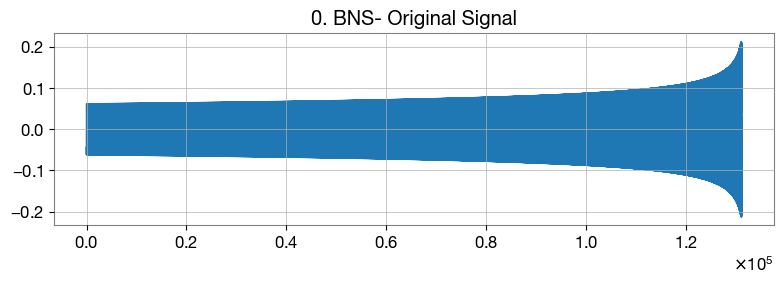

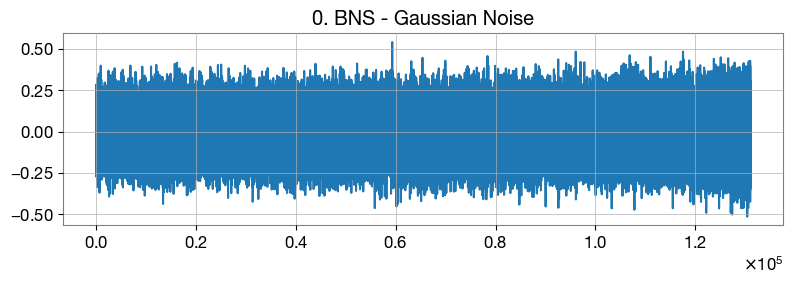

signal_example: [-0.00331162 -0.00425366 -0.00517953 ...  0.          0.
  0.        ] - shape: (131072,),  type: <class 'numpy.ndarray'> 


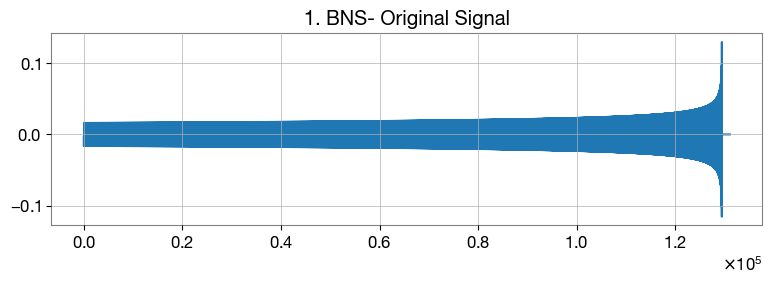

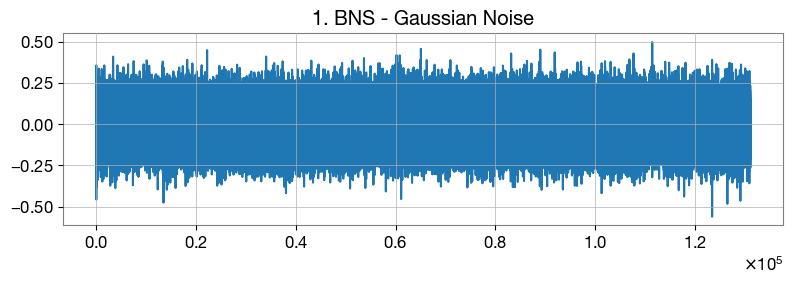

signal_example: [-0.12901728 -0.13696115 -0.14446292 ...  0.26135598  0.39472221
  0.49591338] - shape: (131072,),  type: <class 'numpy.ndarray'> 


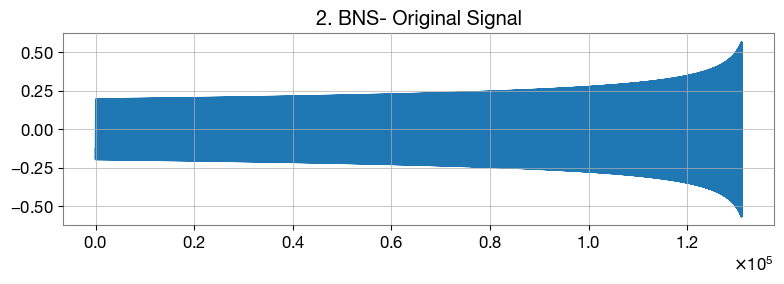

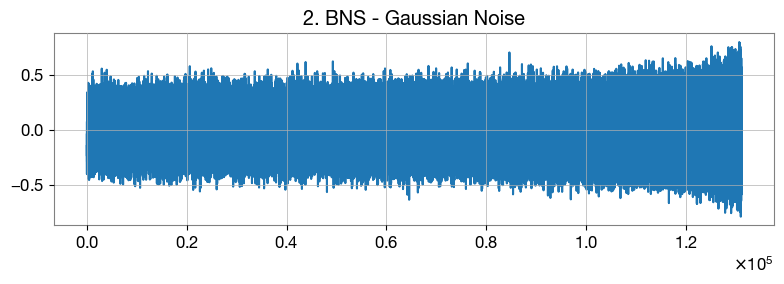

signal_example: [-0.07344704 -0.0730397  -0.07240518 ...  0.19566209  0.20733355
  0.20320131] - shape: (131072,),  type: <class 'numpy.ndarray'> 


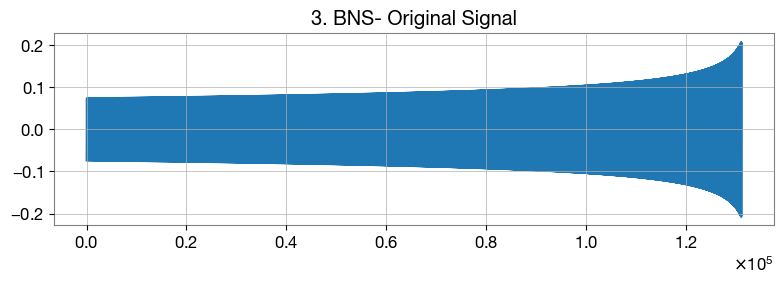

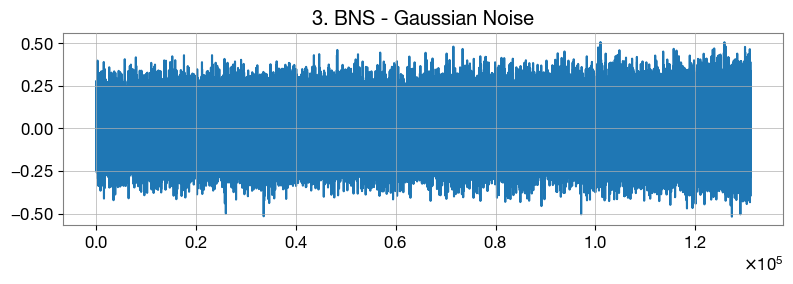

signal_example: [-0.05290221 -0.05354336 -0.05399039 ...  0.21429671 -0.00327211
 -0.20945021] - shape: (131072,),  type: <class 'numpy.ndarray'> 


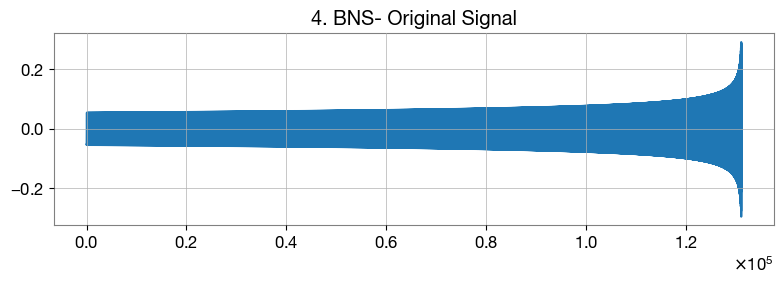

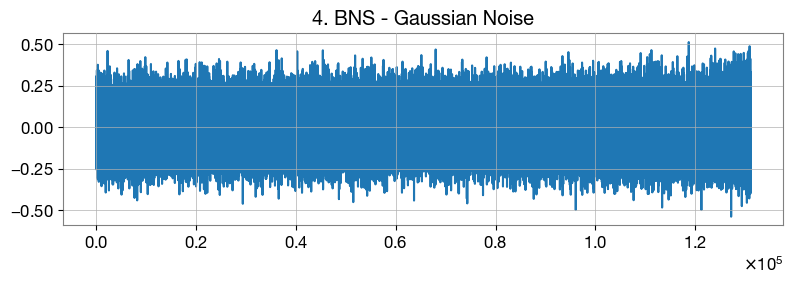

In [13]:
def main():
    bbh_dataset = pd.read_csv('/Users/aycayk/Desktop/myz/data/1000_example/BNS_1000_4K.csv')

    labels = bbh_dataset.iloc[:, -1].to_numpy()
    signals = bbh_dataset.iloc[:, :-1].to_numpy()
    print(f"signals: {signals} - shape: {signals.shape}, type: {type(signals)}")


    for i in range(5):
        signal_example  = signals[i]
        print(f"signal_example: {signal_example} - shape: {signal_example.shape},  type: {type(signal_example)} ")

        noisy_signal_gauss = add_gauss_noise_to_signal(signal_example, duration=32)

        signals_to_plot = [signal_example, noisy_signal_gauss]
        labels_to_plot = [f"{i}. BNS- Original Signal", f"{i}. BNS - Gaussian Noise"]

        plot_signals(signals_to_plot, labels_to_plot)

    return


if __name__ == "__main__":
    main()

signals: [[-4.06903063e-02 -4.05505754e-02 -4.03644245e-02 ...
  -2.02954790e-05 -3.95857009e-05  0.00000000e+00]
 [-4.66010474e-02 -4.31421467e-02 -3.96365860e-02 ...
   2.62608810e-02 -3.12706237e-02 -8.79078951e-02]
 [-4.75998023e-03 -3.90399797e-03 -3.04412771e-03 ...
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 ...
 [ 1.88340138e-02  1.87979051e-02  1.87373269e-02 ...
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.39190635e-03 -8.97795269e-03 -1.15564996e-02 ...
   2.01913235e-01  1.79094312e-01  1.52645936e-01]
 [-1.58560724e-01 -1.60423952e-01 -1.62109552e-01 ...
   4.32329219e-02 -1.00617956e-01 -2.37521335e-01]] - shape: (1000, 131072), type: <class 'numpy.ndarray'>
signal_example: [-4.06903063e-02 -4.05505754e-02 -4.03644245e-02 ...
 -2.02954790e-05 -3.95857009e-05  0.00000000e+00] - shape: (131072,),  type: <class 'numpy.ndarray'> 


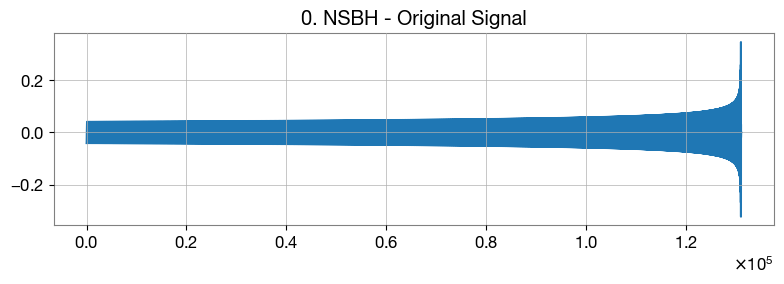

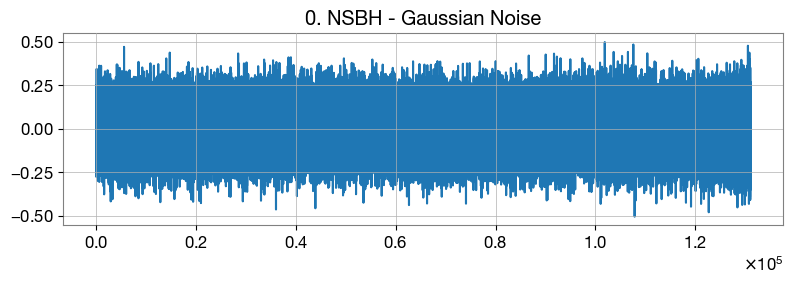

signal_example: [-0.04660105 -0.04314215 -0.03963659 ...  0.02626088 -0.03127062
 -0.0879079 ] - shape: (131072,),  type: <class 'numpy.ndarray'> 


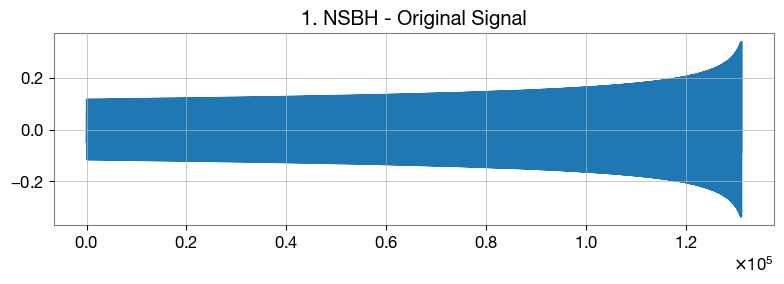

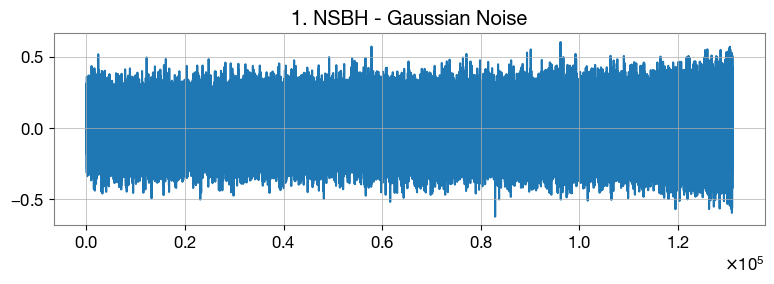

signal_example: [-0.00475998 -0.003904   -0.00304413 ...  0.          0.
  0.        ] - shape: (131072,),  type: <class 'numpy.ndarray'> 


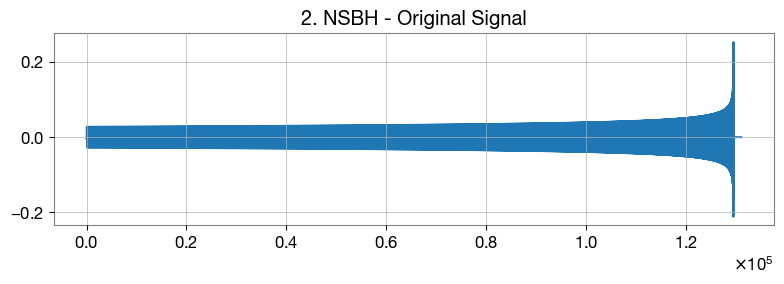

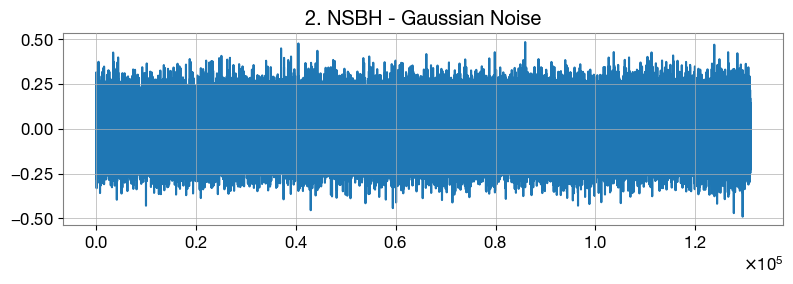

signal_example: [0.02584515 0.027164   0.02845248 ... 0.13240542 0.13987909
 0.14251552] - shape: (131072,),  type: <class 'numpy.ndarray'> 


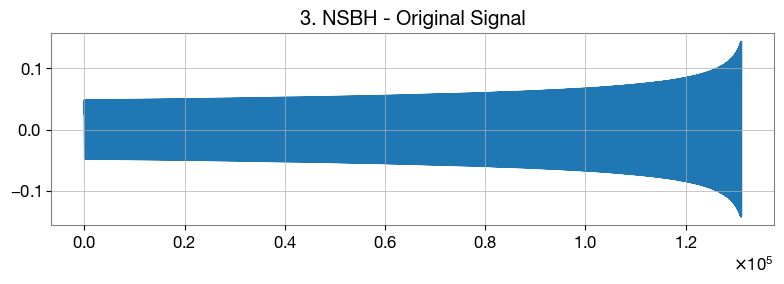

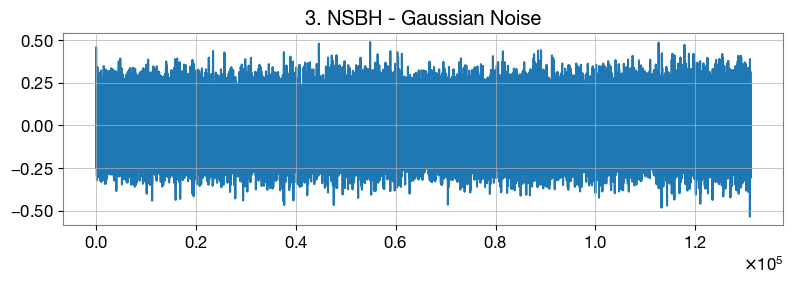

signal_example: [0.05437461 0.05406298 0.05368904 ... 0.         0.
 0.        ] - shape: (131072,),  type: <class 'numpy.ndarray'> 


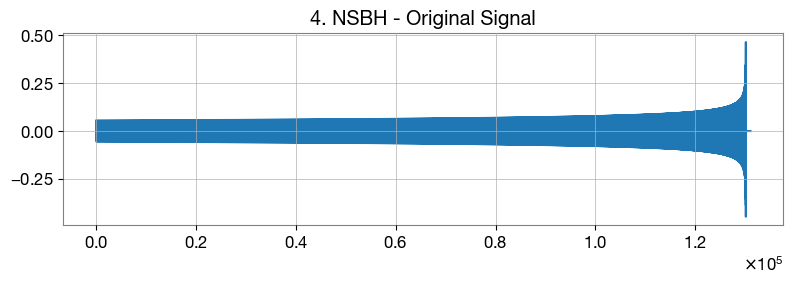

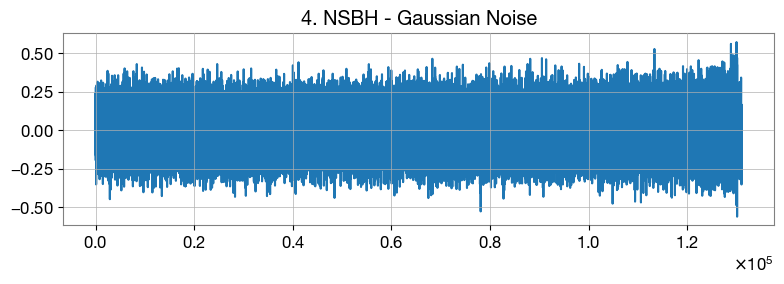

In [14]:
def main():
    bbh_dataset = pd.read_csv('/Users/aycayk/Desktop/myz/data/1000_example/NSBH_1000_4K.csv')

    labels = bbh_dataset.iloc[:, -1].to_numpy()
    signals = bbh_dataset.iloc[:, :-1].to_numpy()
    print(f"signals: {signals} - shape: {signals.shape}, type: {type(signals)}")


    for i in range(5):
        signal_example  = signals[i]
        print(f"signal_example: {signal_example} - shape: {signal_example.shape},  type: {type(signal_example)} ")

        noisy_signal_gauss = add_gauss_noise_to_signal(signal_example, duration=32)

        signals_to_plot = [signal_example, noisy_signal_gauss]
        labels_to_plot = [f"{i}. NSBH - Original Signal", f"{i}. NSBH - Gaussian Noise"]

        plot_signals(signals_to_plot, labels_to_plot)

    return


if __name__ == "__main__":
    main()

## DIFFERENCE AND SIMILARITY TEST


### BBH -  difference graph & cosine similarity

signal_example: [0. 0. 0. ... 0. 0. 0.] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.9996219170065399


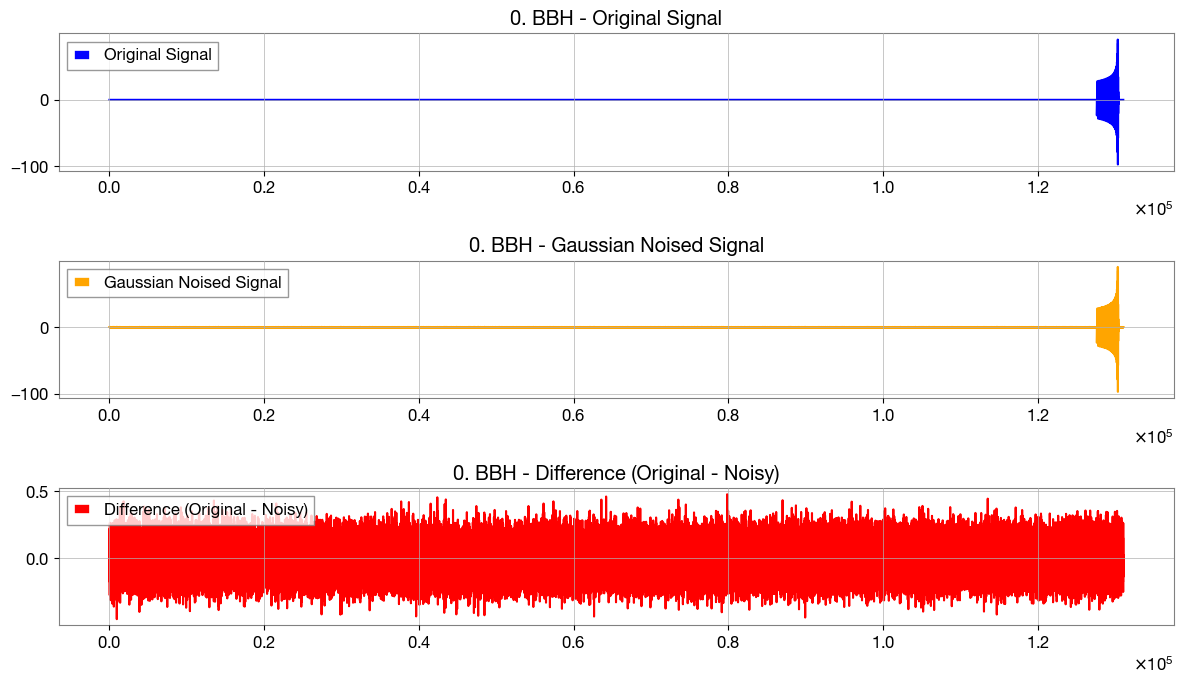

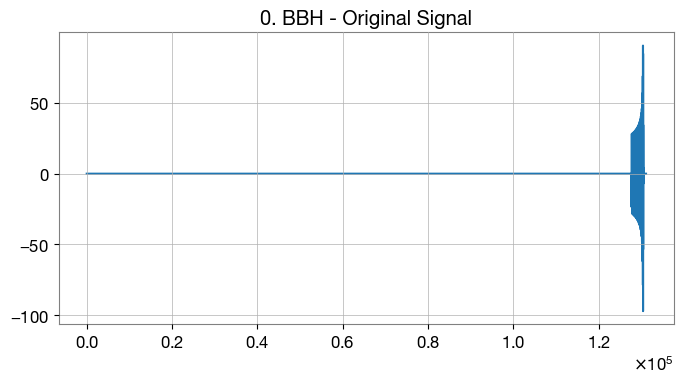

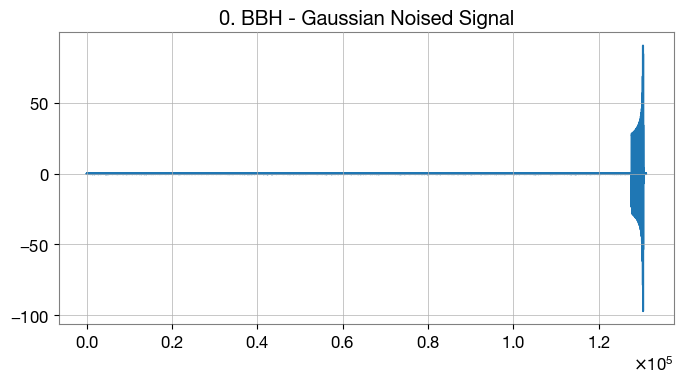

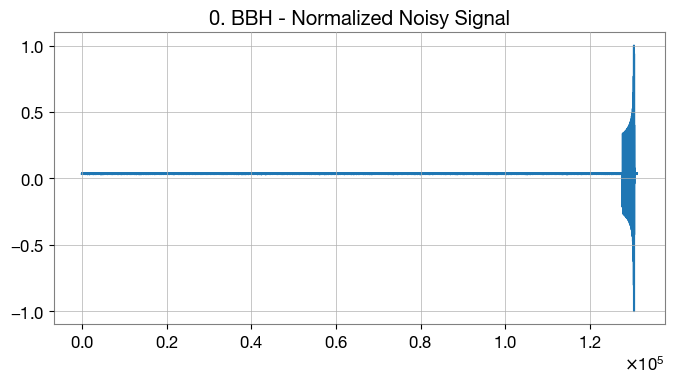

signal_example: [0. 0. 0. ... 0. 0. 0.] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.985248954794395


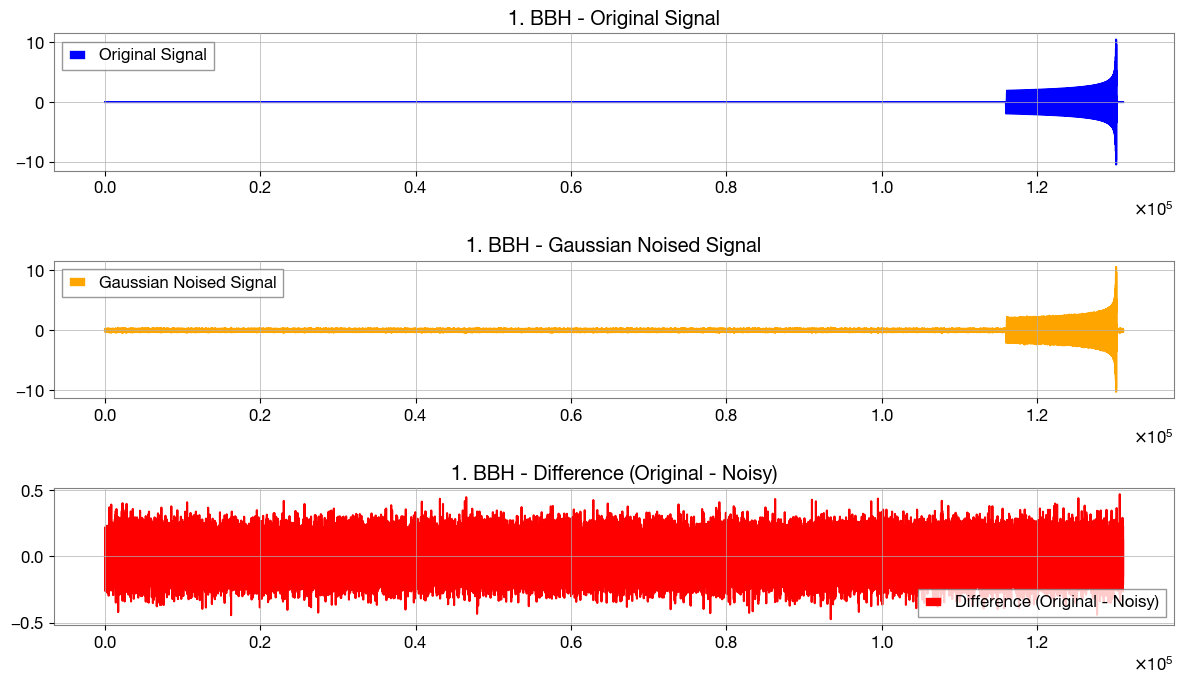

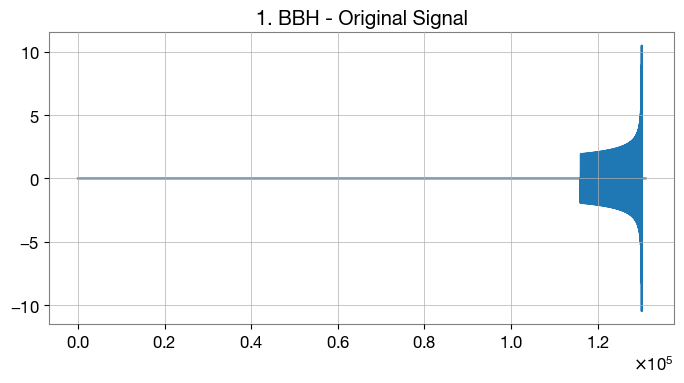

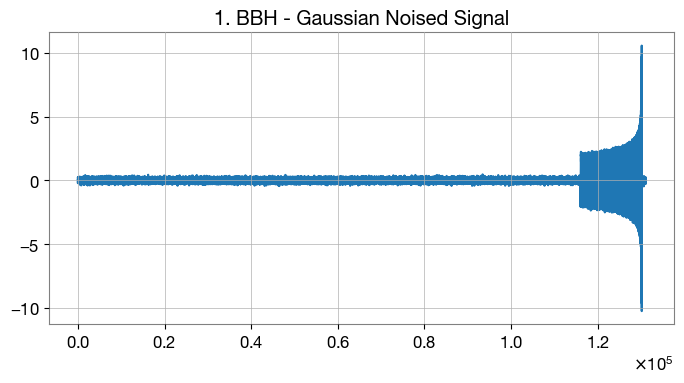

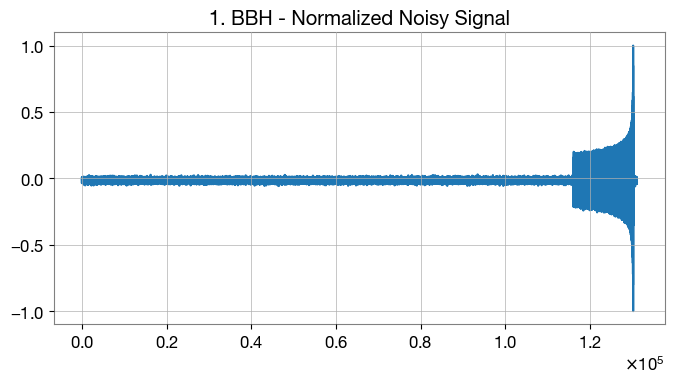

signal_example: [0. 0. 0. ... 0. 0. 0.] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.9996121815958291


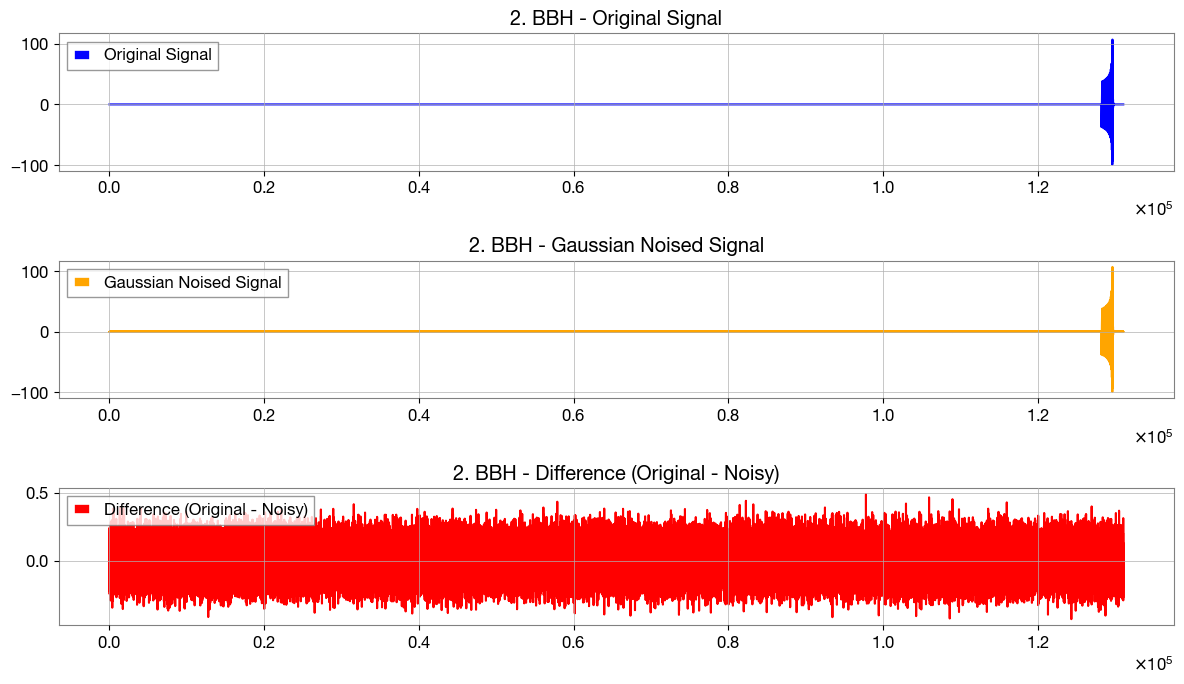

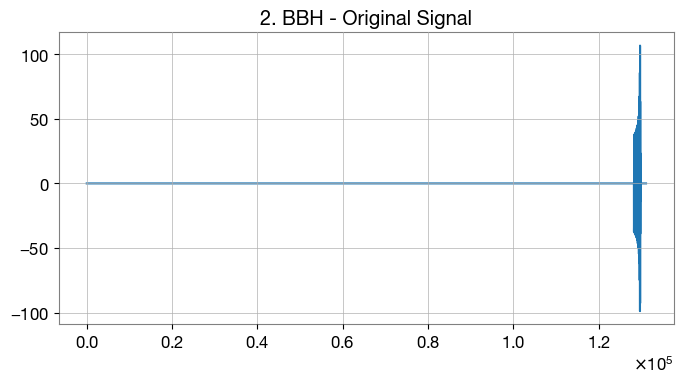

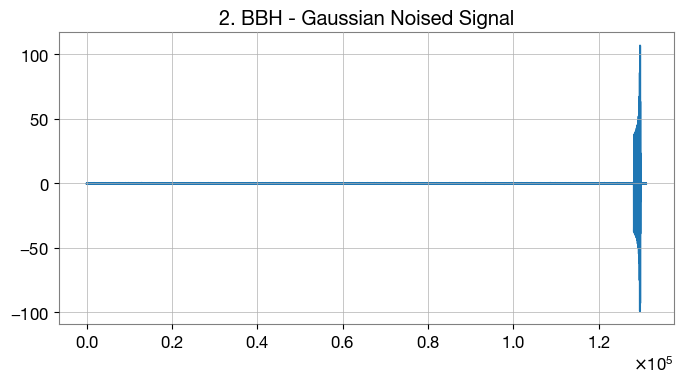

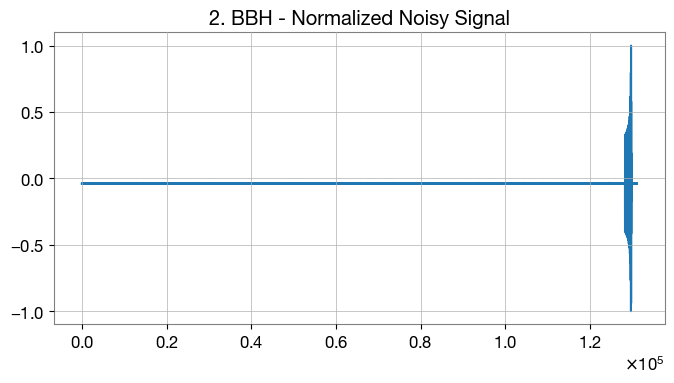

In [15]:
signal_sampling_frequency = 4096 
signal_duration = 32  

def plot_single_signal(signal, desc="Graviational Wave"):
    plt.plot(signal)
    plt.title(f"{desc}")
    plt.show()

def plot_signals(signals, labels):
    for signal, label in zip(signals, labels):
        plt.figure(figsize=(7, 4))  
        plt.plot(signal)
        plt.title(label)
        plt.grid(True)
        plt.tight_layout()
    plt.show()


def add_gauss_noise_to_signal(signal, flow=30.0, delta_f=1.0/16, delta_t=1.0/4096, duration=32):

    flow = 30.0
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    delta_t = 1.0 / 4096
    tsamples = int(duration / delta_t)
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd)

    noise *= 1e21
    noise *= 0.4
    noise = TimeSeries.from_pycbc(noise)

    if not isinstance(signal, TimeSeries):
        signal = TimeSeries(signal, sample_rate=1.0/delta_t)
    
    noise_signal = noise.inject(signal)    
        
    return noise_signal.value


def normalize_to_real_world(signal, min_value=-1., max_value=1.):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    normalized_signal = (signal - signal_min) / (signal_max - signal_min)  
    normalized_signal = normalized_signal * (max_value - min_value) + min_value  
    return normalized_signal


def plot_signals_with_difference(signal_example, noisy_signal_gauss, difference, i):
    plt.figure(figsize=(12, 7))

    plt.subplot(3, 1, 1) 
    plt.plot(signal_example, color='blue', label="Original Signal")
    plt.title(f"{i}. BBH - Original Signal")
    plt.grid(True)
    plt.legend()

    # Plot the noisy signal
    plt.subplot(3, 1, 2)  # 3 rows, 1 column, position 2
    plt.plot(noisy_signal_gauss, color='orange', label="Gaussian Noised Signal")
    plt.title(f"{i}. BBH - Gaussian Noised Signal")
    plt.grid(True)
    plt.legend()

    # Plot the difference
    plt.subplot(3, 1, 3)  # 3 rows, 1 column, position 3
    plt.plot(difference, color='red', label="Difference (Original - Noisy)")
    plt.title(f"{i}. BBH - Difference (Original - Noisy)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    bbh_dataset = pd.read_csv('/Users/aycayk/Desktop/myz/data/1000_example/BBH_1000_4K.csv')

    labels = bbh_dataset.iloc[:, -1].to_numpy()
    signals = bbh_dataset.iloc[:, :-1].to_numpy()
   

    for i in range(3):
        signal_example  = signals[i]
        print(f"signal_example: {signal_example} - shape: {signal_example.shape},  type: {type(signal_example)} ")

        # Add Gaussian noise to the signal
        noisy_signal_gauss = add_gauss_noise_to_signal(signal_example, duration=32)

        # Calculate cosine similarity
        cosine = np.dot(signal_example, noisy_signal_gauss) / (norm(signal_example) * norm(noisy_signal_gauss))
        print(f"Cosine Similarity (Original vs. Noisy): {cosine}")

        # Normalize the noisy signal
        normalized_noisy_signal = normalize_to_real_world(noisy_signal_gauss)

        difference = signal_example - noisy_signal_gauss
        plot_signals_with_difference(signal_example, noisy_signal_gauss, difference, i)

    
        signals_to_plot = [
            signal_example, 
            noisy_signal_gauss, 
            normalized_noisy_signal
        ]
        
        labels_to_plot = [
            f"{i}. BBH - Original Signal", 
            f"{i}. BBH - Gaussian Noised Signal", 
            f"{i}. BBH - Normalized Noisy Signal"
        ]

        plot_signals(signals_to_plot, labels_to_plot)

    return


if __name__ == "__main__":
    main()

### BNS -  difference graph & cosine similarity

signal_example: [-0.04525833 -0.04782374 -0.05020136 ...  0.03837291  0.12562785
  0.187801  ] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.4802094199362396


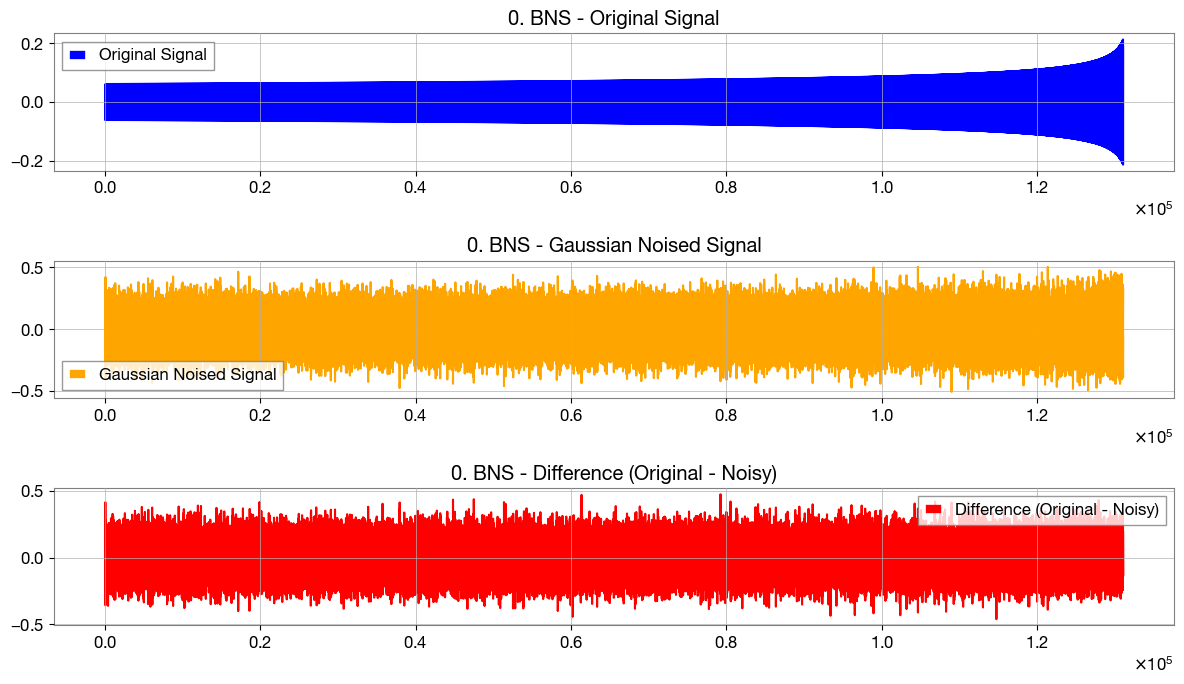

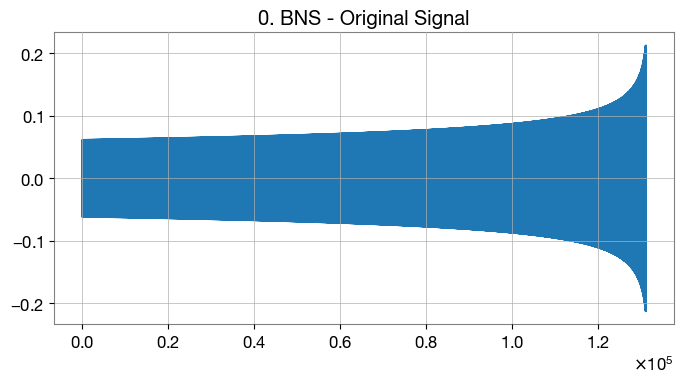

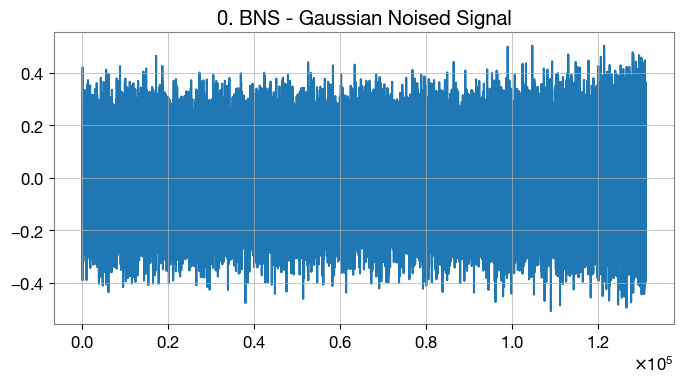

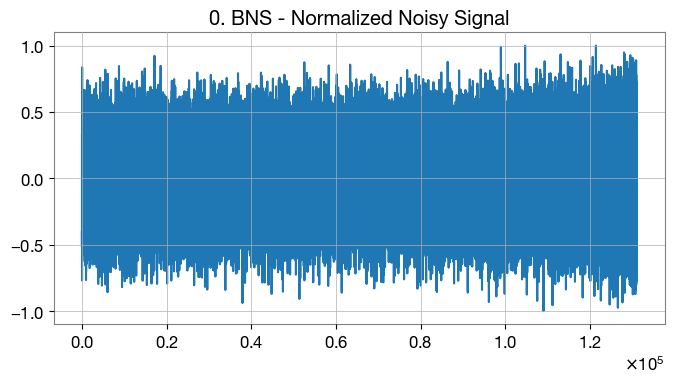

signal_example: [-0.00331162 -0.00425366 -0.00517953 ...  0.          0.
  0.        ] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.14486567538851972


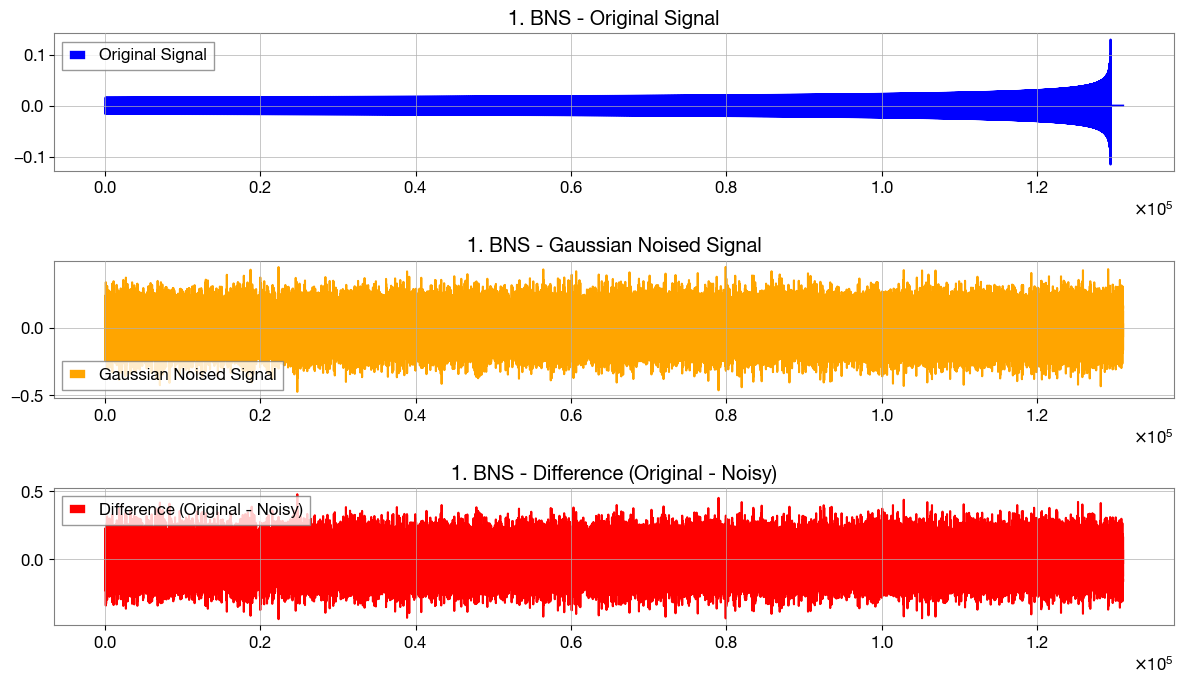

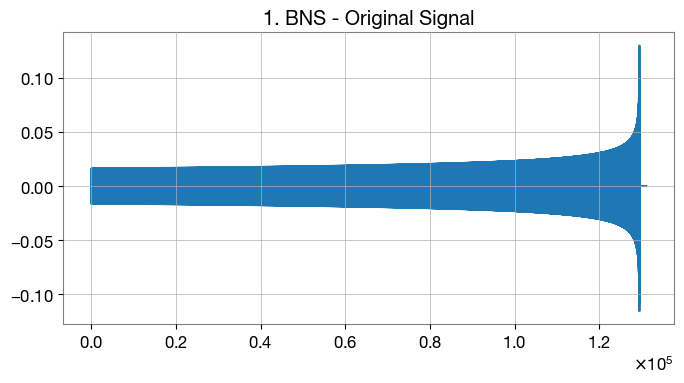

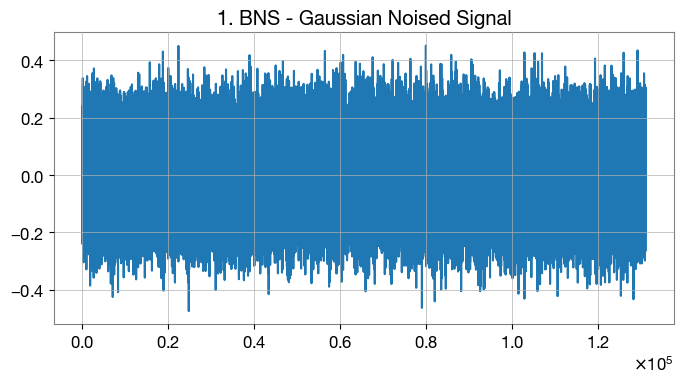

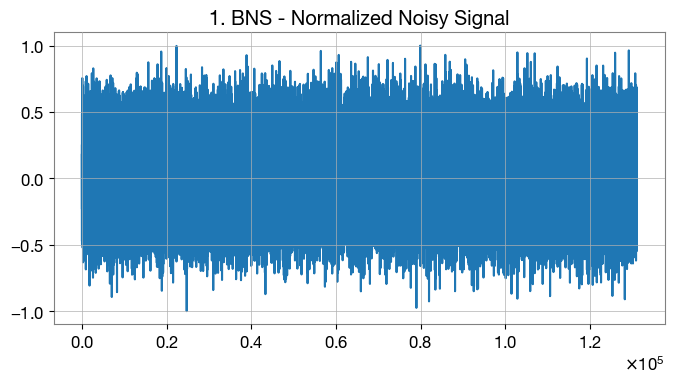

signal_example: [-0.12901728 -0.13696115 -0.14446292 ...  0.26135598  0.39472221
  0.49591338] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.8644146418731339


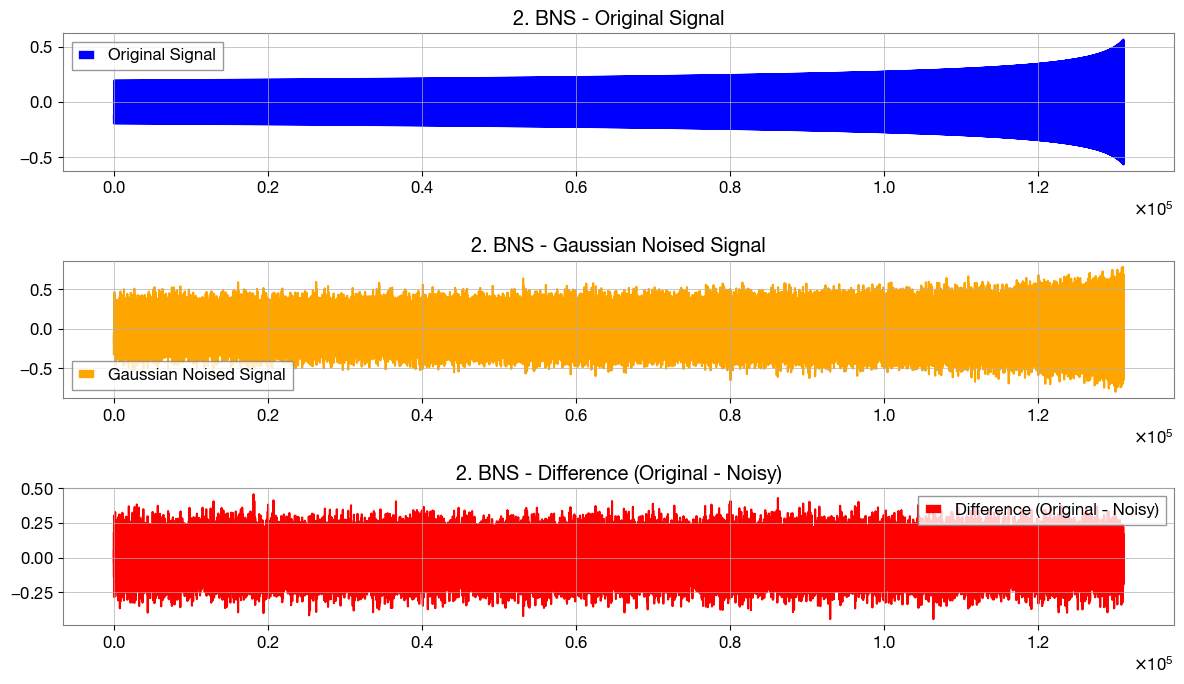

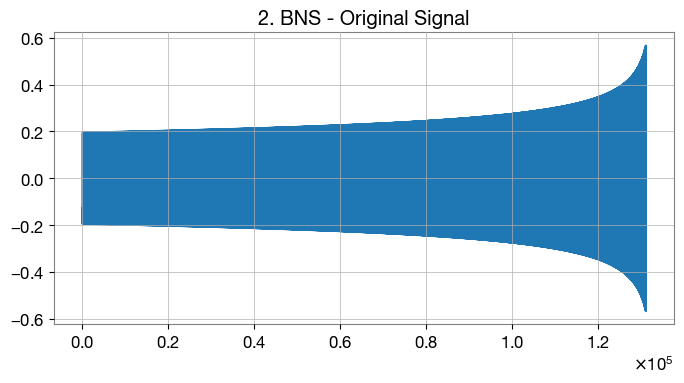

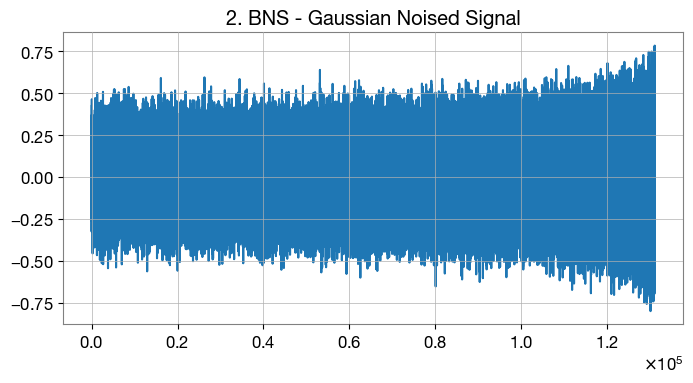

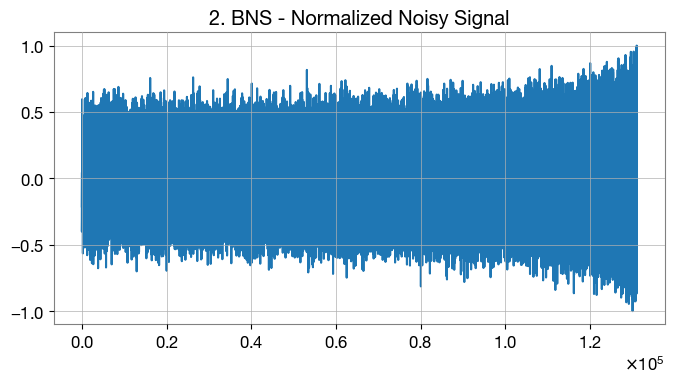

In [16]:
def plot_signals_with_difference(signal_example, noisy_signal_gauss, difference, i):
    plt.figure(figsize=(12, 7))

    plt.subplot(3, 1, 1) 
    plt.plot(signal_example, color='blue', label="Original Signal")
    plt.title(f"{i}. BNS - Original Signal")
    plt.grid(True)
    plt.legend()

    # Plot the noisy signal
    plt.subplot(3, 1, 2)  # 3 rows, 1 column, position 2
    plt.plot(noisy_signal_gauss, color='orange', label="Gaussian Noised Signal")
    plt.title(f"{i}. BNS - Gaussian Noised Signal")
    plt.grid(True)
    plt.legend()

    # Plot the difference
    plt.subplot(3, 1, 3)  # 3 rows, 1 column, position 3
    plt.plot(difference, color='red', label="Difference (Original - Noisy)")
    plt.title(f"{i}. BNS - Difference (Original - Noisy)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    bbh_dataset = pd.read_csv('/Users/aycayk/Desktop/myz/data/1000_example/BNS_1000_4K.csv')

    labels = bbh_dataset.iloc[:, -1].to_numpy()
    signals = bbh_dataset.iloc[:, :-1].to_numpy()
   

    for i in range(3):
        signal_example  = signals[i]
        print(f"signal_example: {signal_example} - shape: {signal_example.shape},  type: {type(signal_example)} ")

        # Add Gaussian noise to the signal
        noisy_signal_gauss = add_gauss_noise_to_signal(signal_example, duration=32)

        # Calculate cosine similarity
        cosine = np.dot(signal_example, noisy_signal_gauss) / (norm(signal_example) * norm(noisy_signal_gauss))
        print(f"Cosine Similarity (Original vs. Noisy): {cosine}")

        # Normalize the noisy signal
        normalized_noisy_signal = normalize_to_real_world(noisy_signal_gauss)

        difference = signal_example - noisy_signal_gauss
        plot_signals_with_difference(signal_example, noisy_signal_gauss, difference, i)

    
        signals_to_plot = [
            signal_example, 
            noisy_signal_gauss, 
            normalized_noisy_signal
        ]
        
        labels_to_plot = [
            f"{i}. BNS - Original Signal", 
            f"{i}. BNS - Gaussian Noised Signal", 
            f"{i}. BNS - Normalized Noisy Signal"
        ]

        plot_signals(signals_to_plot, labels_to_plot)

    return


if __name__ == "__main__":
    main()

### NSBH -  difference graph & cosine similarity

signal_example: [-0.04525833 -0.04782374 -0.05020136 ...  0.03837291  0.12562785
  0.187801  ] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.4814694805886284


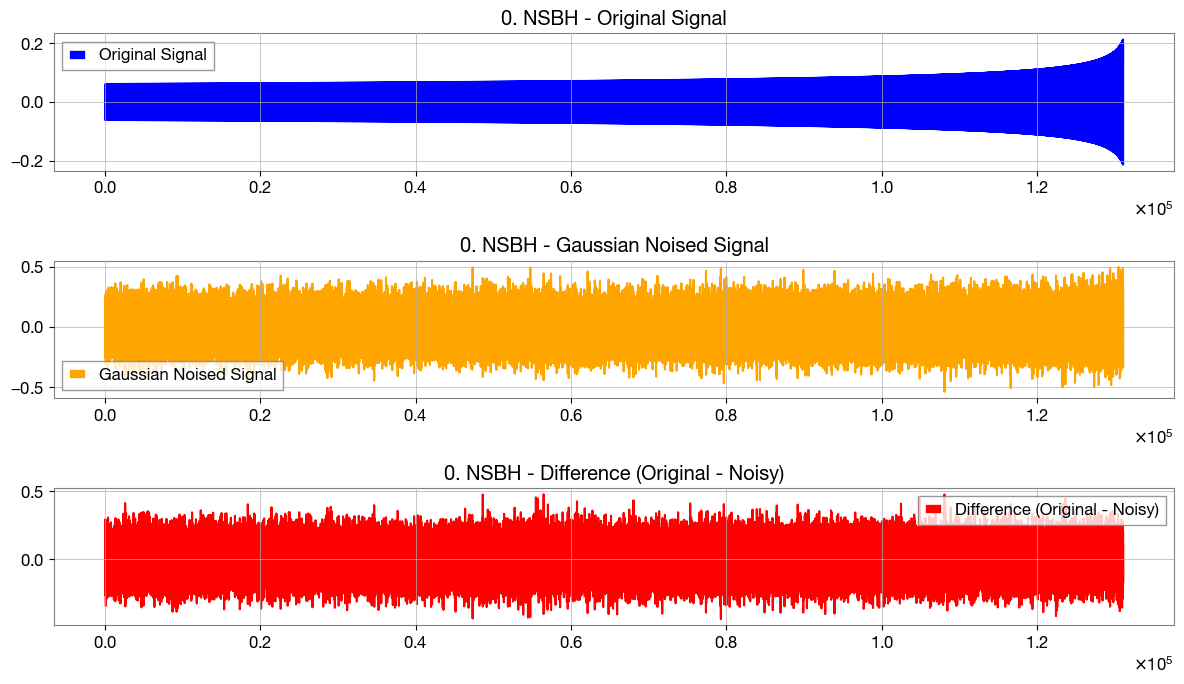

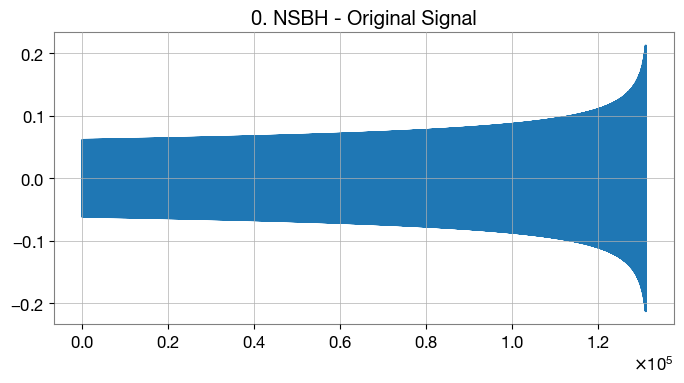

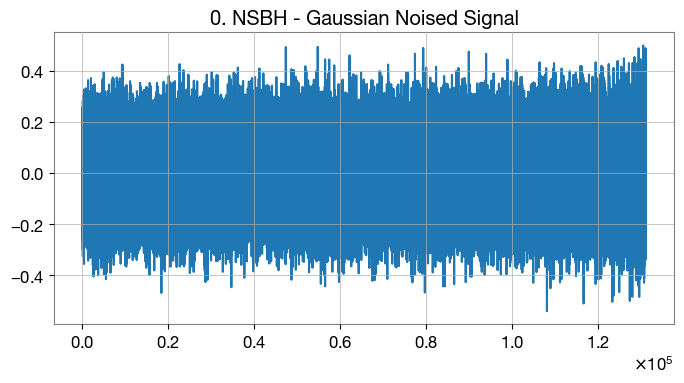

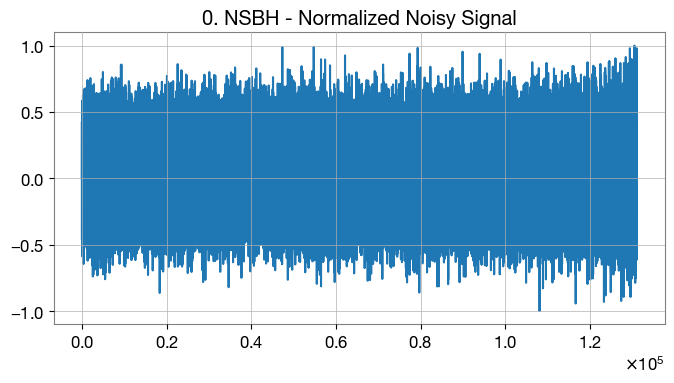

signal_example: [-0.00331162 -0.00425366 -0.00517953 ...  0.          0.
  0.        ] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.1452874291032174


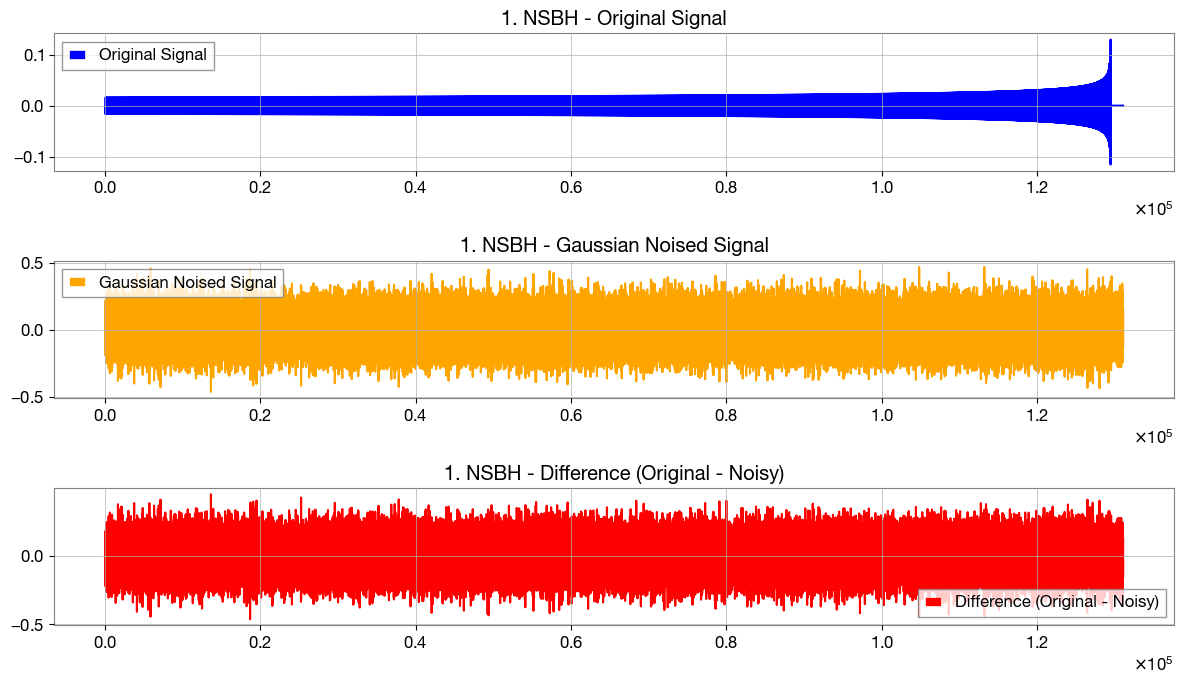

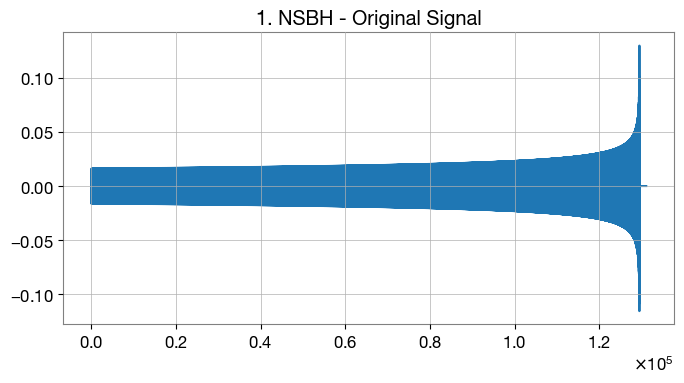

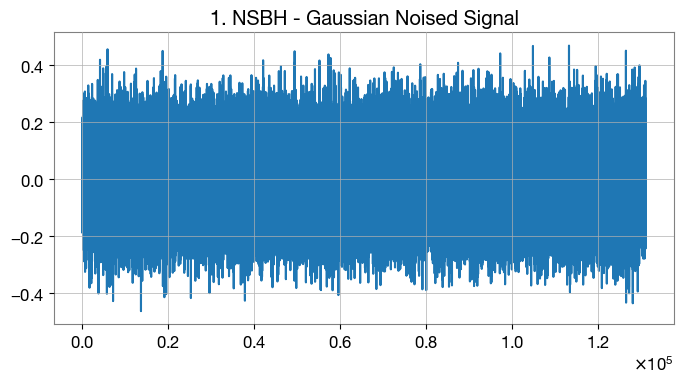

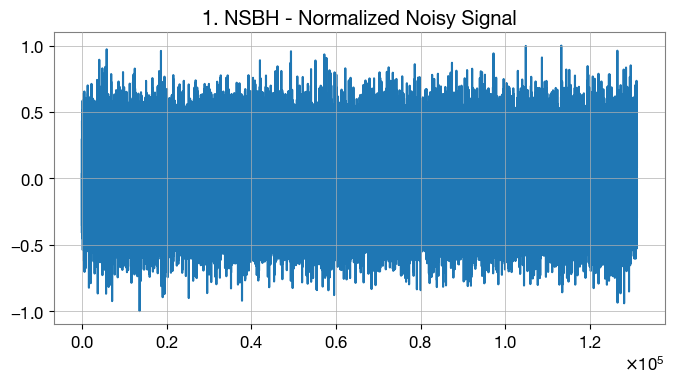

signal_example: [-0.12901728 -0.13696115 -0.14446292 ...  0.26135598  0.39472221
  0.49591338] - shape: (131072,),  type: <class 'numpy.ndarray'> 
Cosine Similarity (Original vs. Noisy): 0.8645528959017552


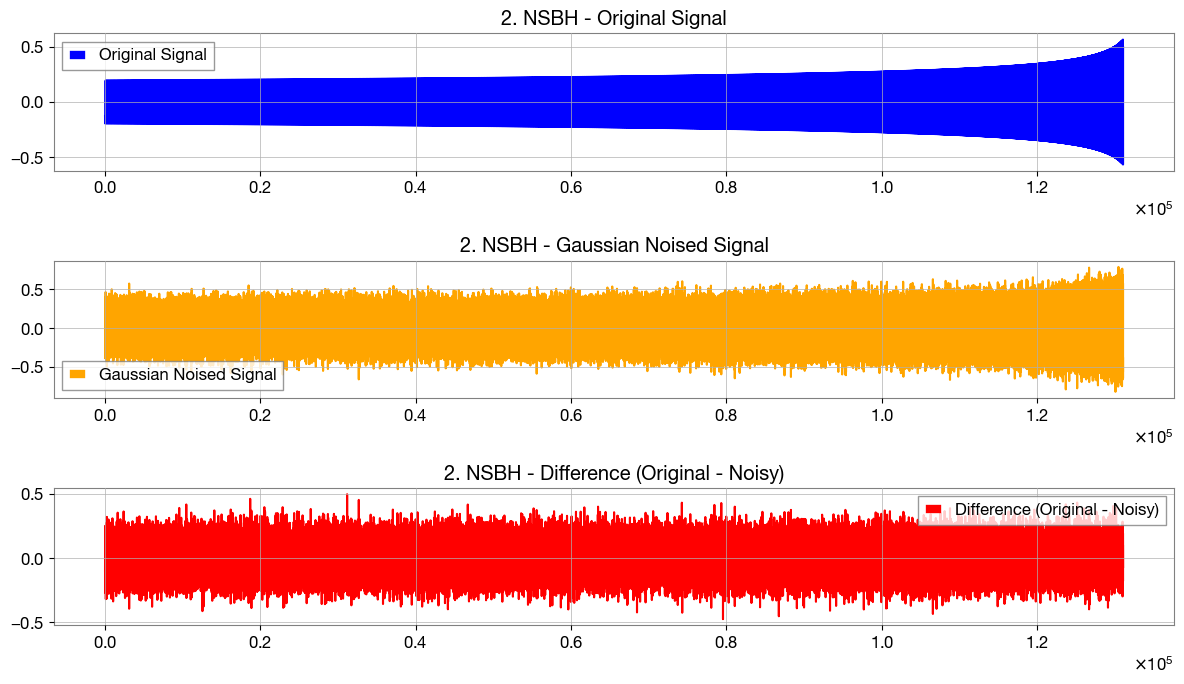

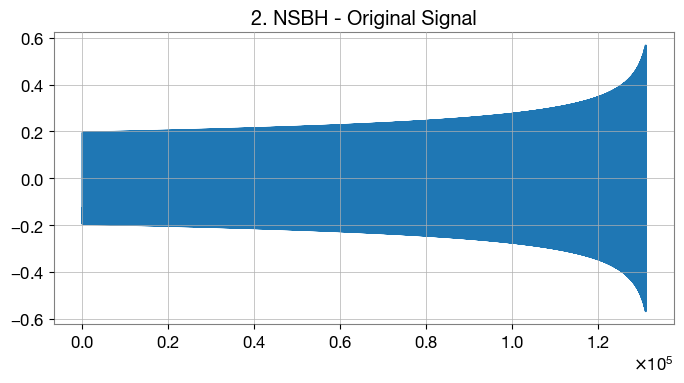

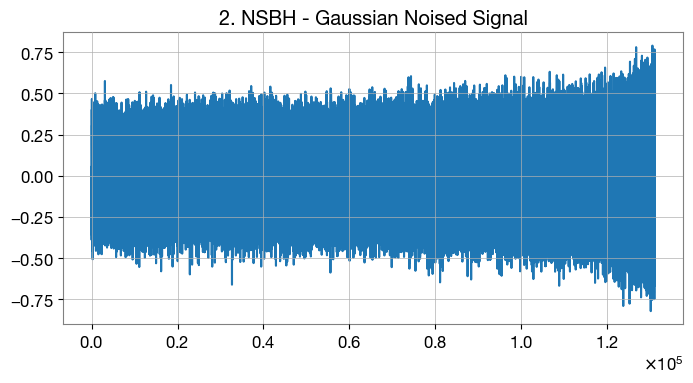

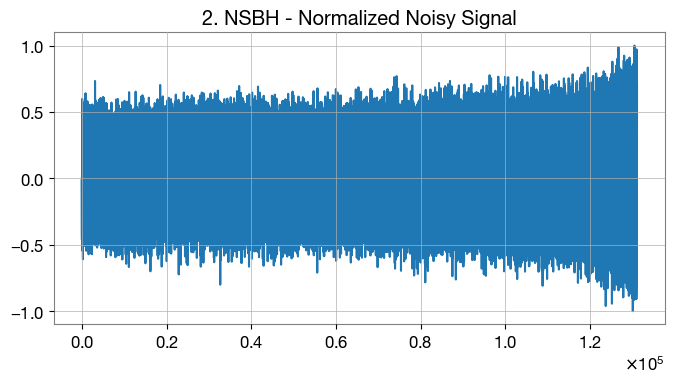

In [18]:
def plot_signals_with_difference(signal_example, noisy_signal_gauss, difference, i):
    plt.figure(figsize=(12, 7))

    plt.subplot(3, 1, 1) 
    plt.plot(signal_example, color='blue', label="Original Signal")
    plt.title(f"{i}. NSBH - Original Signal")
    plt.grid(True)
    plt.legend()

    # Plot the noisy signal
    plt.subplot(3, 1, 2)  # 3 rows, 1 column, position 2
    plt.plot(noisy_signal_gauss, color='orange', label="Gaussian Noised Signal")
    plt.title(f"{i}. NSBH - Gaussian Noised Signal")
    plt.grid(True)
    plt.legend()

    # Plot the difference
    plt.subplot(3, 1, 3)  # 3 rows, 1 column, position 3
    plt.plot(difference, color='red', label="Difference (Original - Noisy)")
    plt.title(f"{i}. NSBH - Difference (Original - Noisy)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    bbh_dataset = pd.read_csv('/Users/aycayk/Desktop/myz/data/1000_example/BNS_1000_4K.csv')

    labels = bbh_dataset.iloc[:, -1].to_numpy()
    signals = bbh_dataset.iloc[:, :-1].to_numpy()
   

    for i in range(3):
        signal_example  = signals[i]
        print(f"signal_example: {signal_example} - shape: {signal_example.shape},  type: {type(signal_example)} ")

        # Add Gaussian noise to the signal
        noisy_signal_gauss = add_gauss_noise_to_signal(signal_example, duration=32)

        # Calculate cosine similarity
        cosine = np.dot(signal_example, noisy_signal_gauss) / (norm(signal_example) * norm(noisy_signal_gauss))
        print(f"Cosine Similarity (Original vs. Noisy): {cosine}")

        # Normalize the noisy signal
        normalized_noisy_signal = normalize_to_real_world(noisy_signal_gauss)

        difference = signal_example - noisy_signal_gauss
        plot_signals_with_difference(signal_example, noisy_signal_gauss, difference, i)

    
        signals_to_plot = [
            signal_example, 
            noisy_signal_gauss, 
            normalized_noisy_signal
        ]
        
        labels_to_plot = [
            f"{i}. NSBH - Original Signal", 
            f"{i}. NSBH - Gaussian Noised Signal", 
            f"{i}. NSBH - Normalized Noisy Signal"
        ]

        plot_signals(signals_to_plot, labels_to_plot)

    return


if __name__ == "__main__":
    main()

## REAL WORLD DATA (SIGNALS FROM GWOSC)

In [19]:
file_paths = [
    '/Users/aycayk/Desktop/myz/hdf5-4K/GW150914_4K_bbh.hdf5',
    '/Users/aycayk/Desktop/myz/hdf5-4K/GW170104_4K_bbh.hdf5',
    '/Users/aycayk/Desktop/myz/hdf5-4K/GW170817_4K_bns.hdf5',
    '/Users/aycayk/Desktop/myz/hdf5-4K/GW190425_4K_bns.hdf5',
    '/Users/aycayk/Desktop/myz/hdf5-4K/GW200105_4K_nsbh.hdf5',
    '/Users/aycayk/Desktop/myz/hdf5-4K/GW200115_4K_nsbh.hdf5'
]

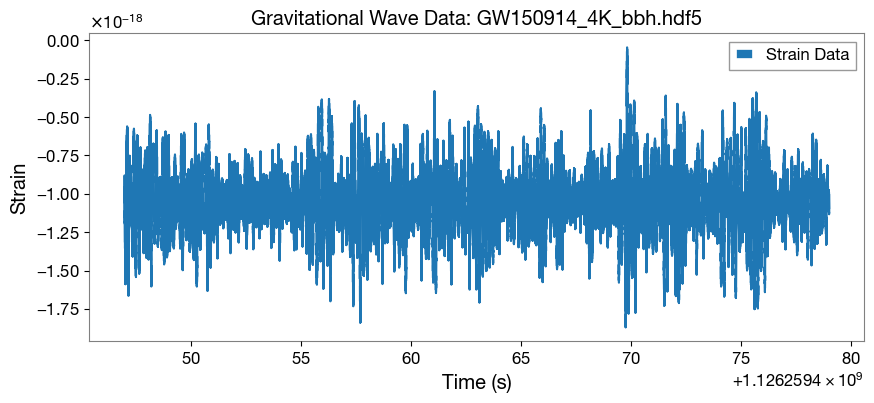

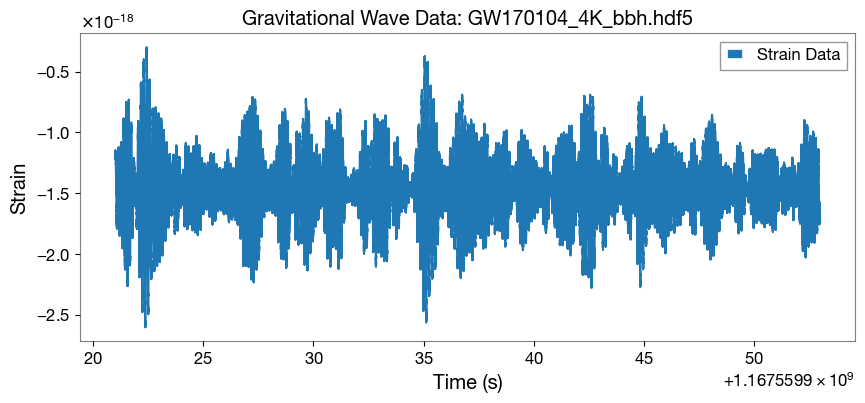

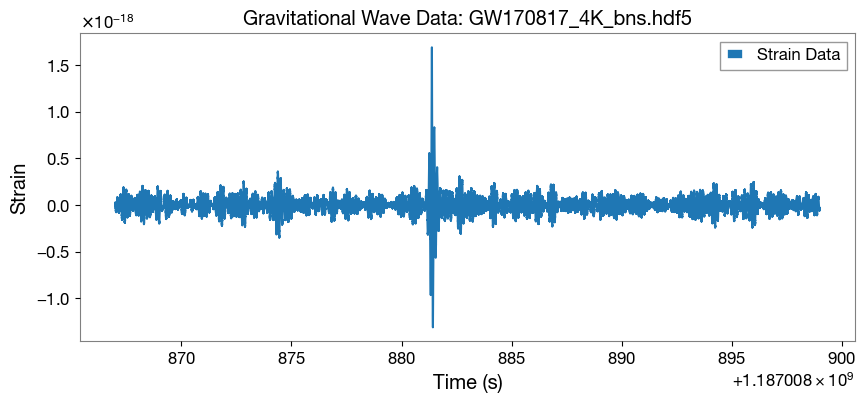

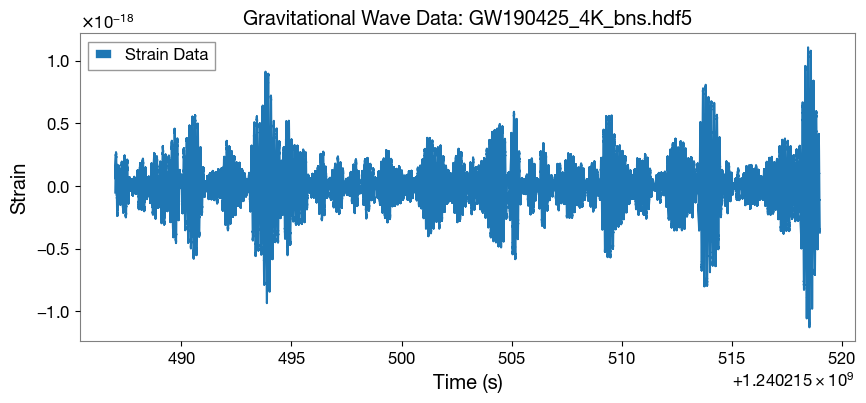

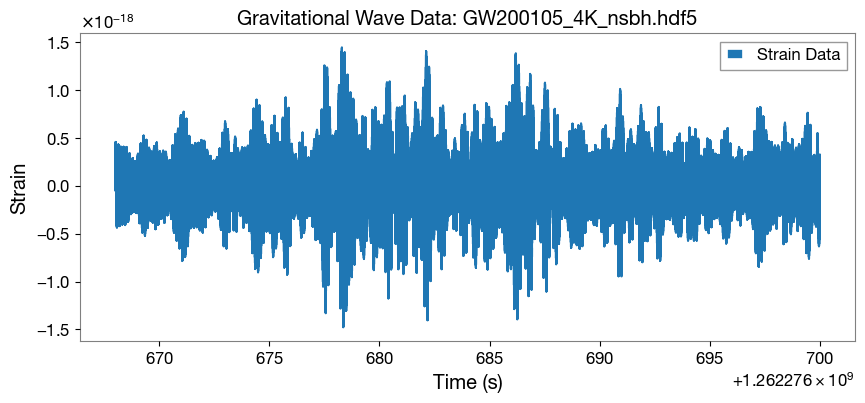

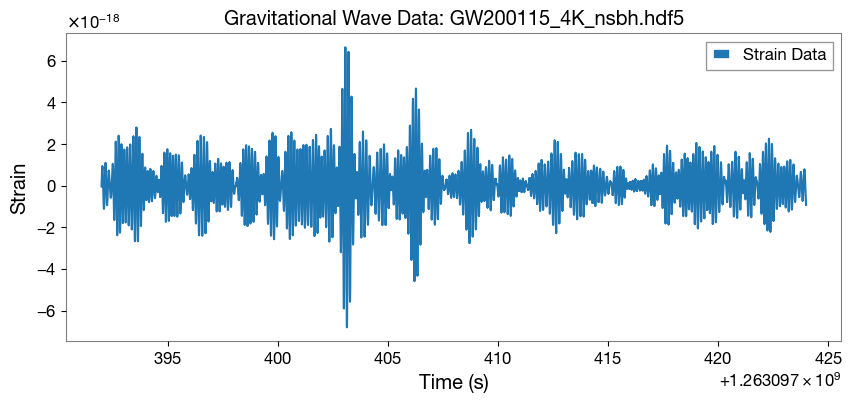

In [85]:
for file_path in file_paths:
    with h5py.File(file_path, 'r') as hdf:
        metadata = {key: hdf['meta'][key][()] for key in hdf['meta']}
        
        strain_data = hdf['strain']['Strain'][:]
        dt = hdf['strain']['Strain'].attrs['Xspacing']
        start_time = metadata['GPSstart']
        time = start_time + dt * np.arange(len(strain_data))
        
        file_name = file_path.split('/')[-1]
        
        plt.figure(figsize=(10, 4))
        plt.plot(time, strain_data, label="Strain Data")
        plt.xlabel("Time (s)")
        plt.ylabel("Strain")
        plt.title(f"Gravitational Wave Data: {file_name}")
        plt.legend()
        plt.grid()
        plt.show()


## NORMALIZING REAL WORLD DATA

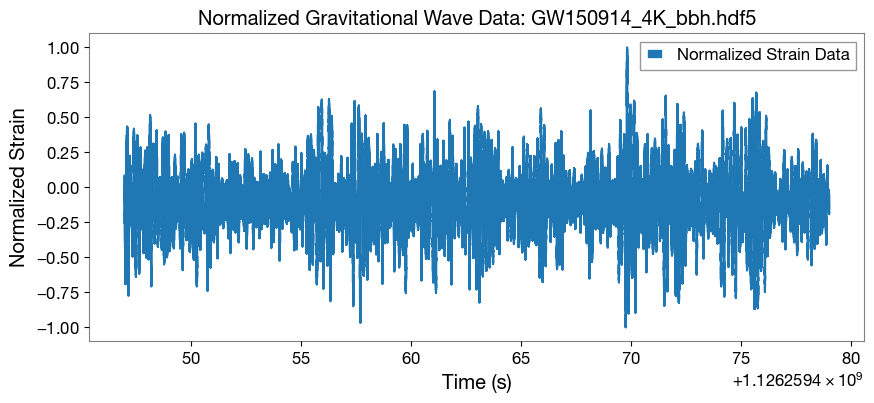

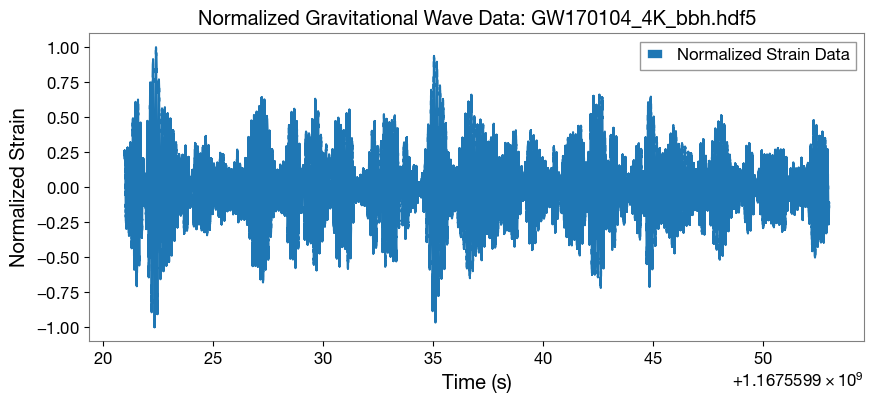

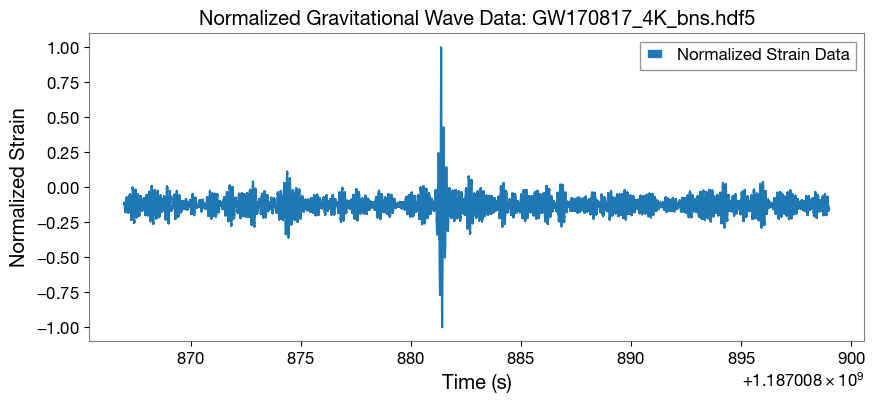

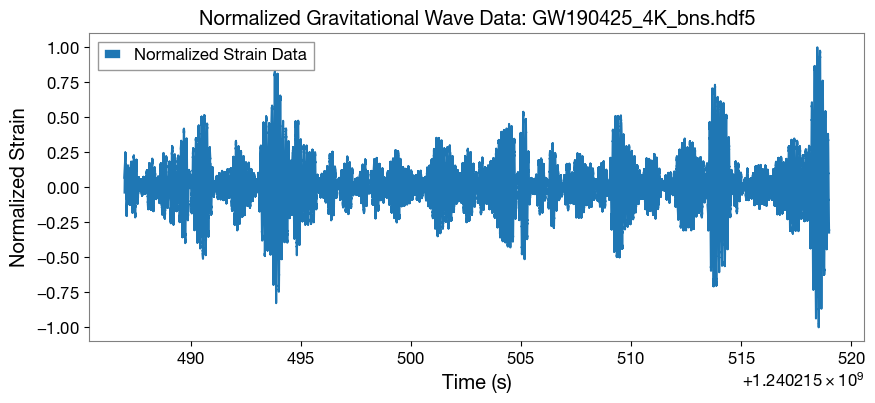

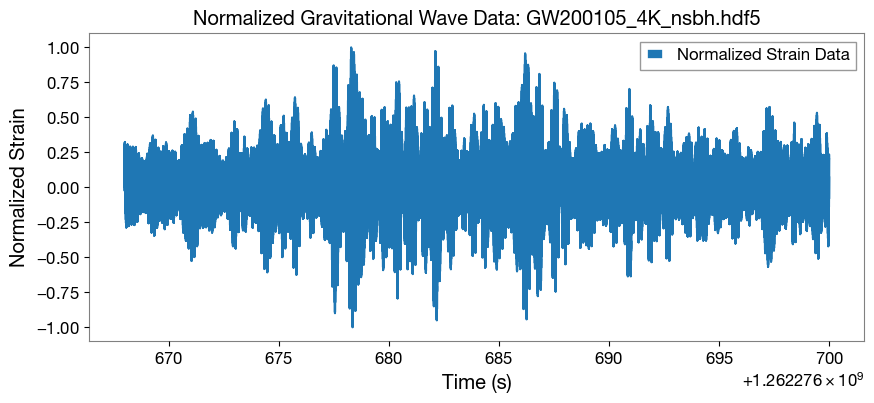

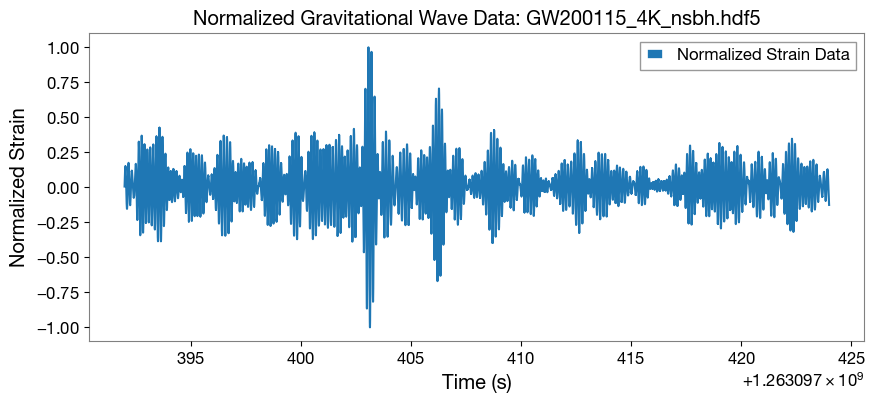

In [87]:
def normalize_to_real_world(signal, min_value=-1., max_value=1.):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    normalized_signal = (signal - signal_min) / (signal_max - signal_min)  
    normalized_signal = normalized_signal * (max_value - min_value) + min_value  
    return normalized_signal

for file_path in file_paths:
    with h5py.File(file_path, 'r') as hdf:
        # Extract metadata and strain data
        metadata = {key: hdf['meta'][key][()] for key in hdf['meta']}
        strain_data = hdf['strain']['Strain'][:]
        dt = hdf['strain']['Strain'].attrs['Xspacing']
        start_time = metadata['GPSstart']
        time = start_time + dt * np.arange(len(strain_data))
        
        # Normalize strain data
        normalized_strain_data = normalize_to_real_world(strain_data)

        # Get the file name for plotting
        file_name = file_path.split('/')[-1]
        
        # Plot normalized data
        plt.figure(figsize=(10, 4))
        plt.plot(time, normalized_strain_data, label="Normalized Strain Data")
        plt.xlabel("Time (s)")
        plt.ylabel("Normalized Strain")
        plt.title(f"Normalized Gravitational Wave Data: {file_name}")
        plt.legend()
        plt.grid()
        plt.show()


## Applying Bandpass Filter on Real Data

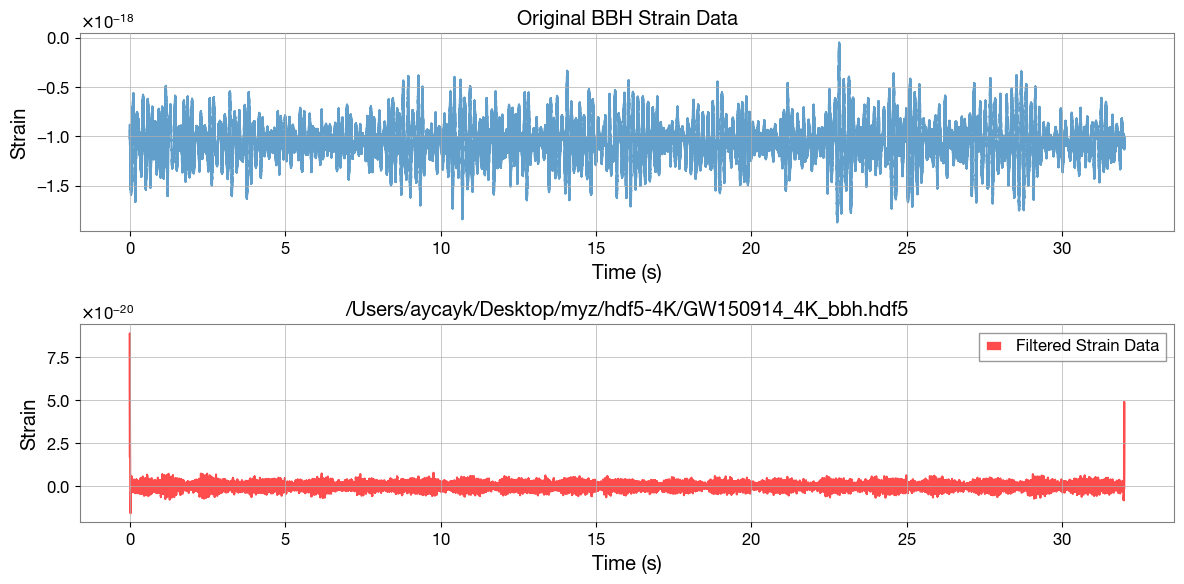

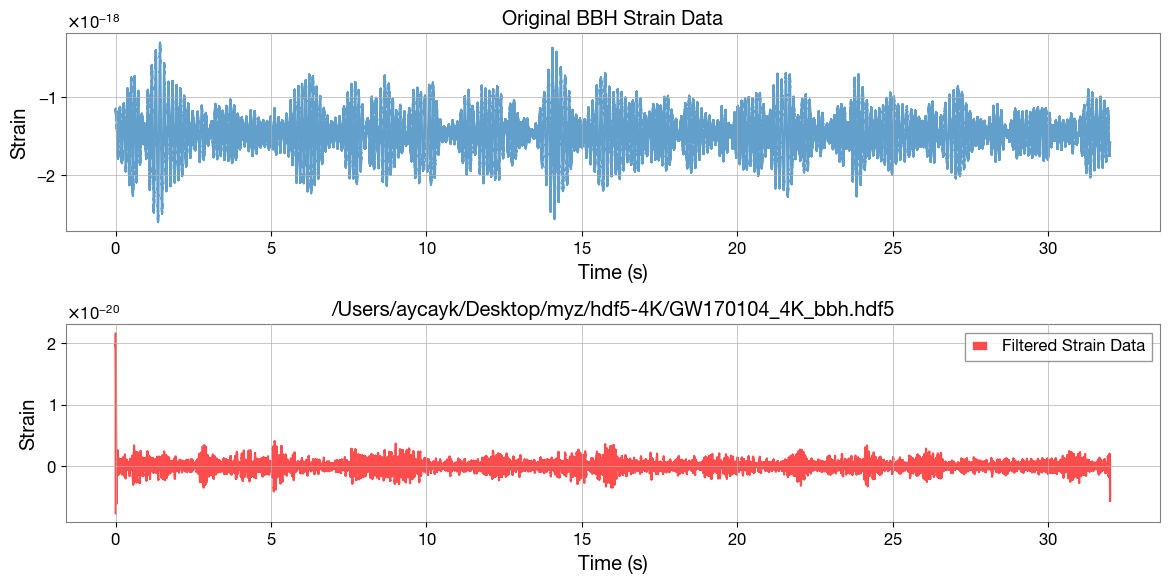

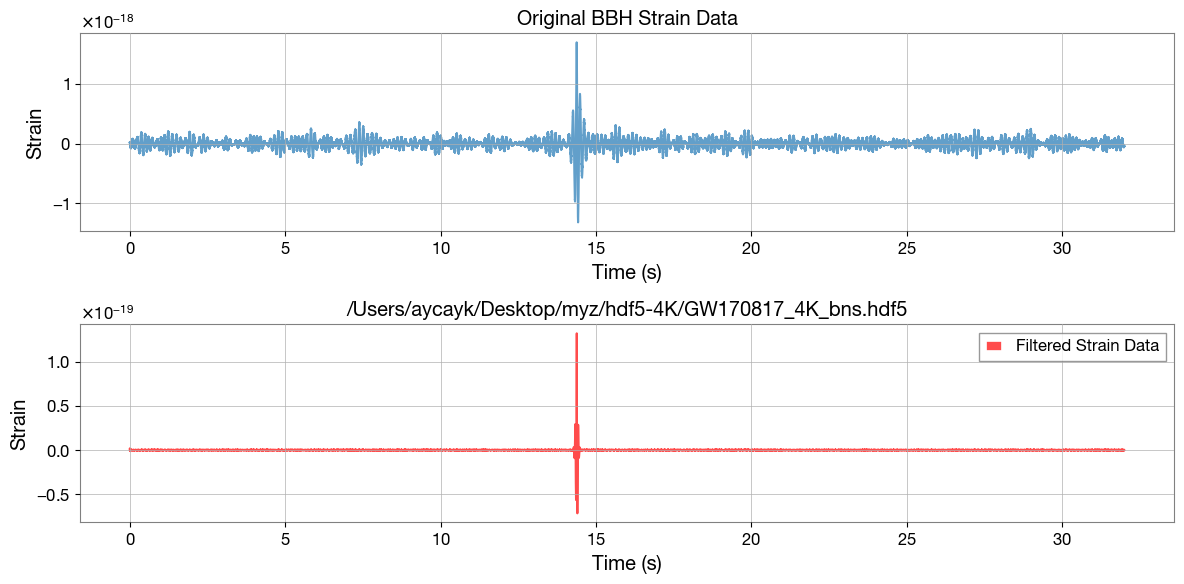

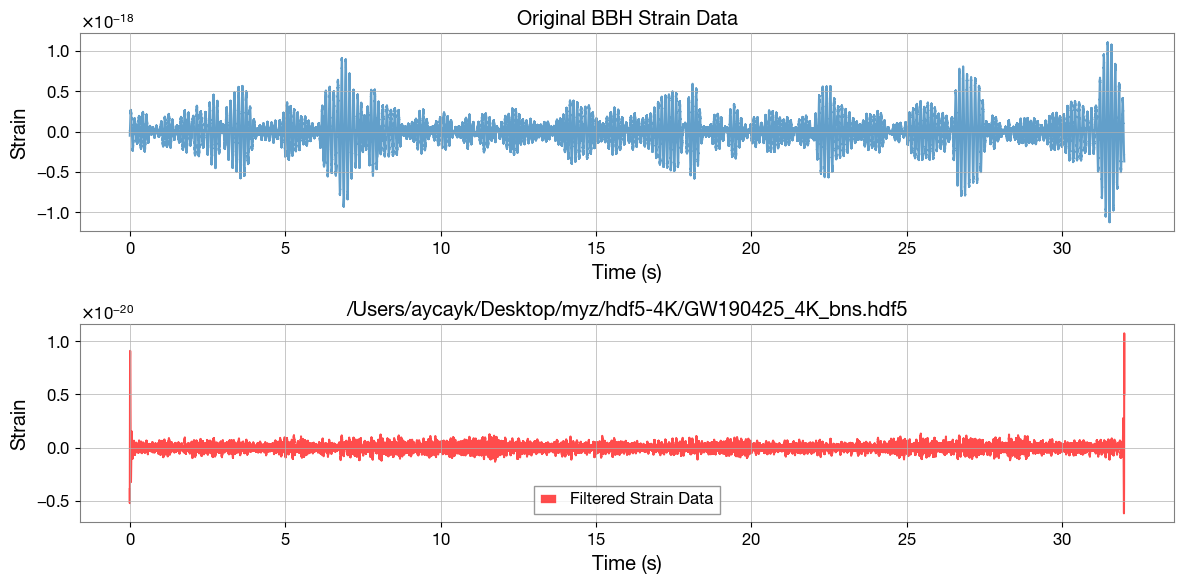

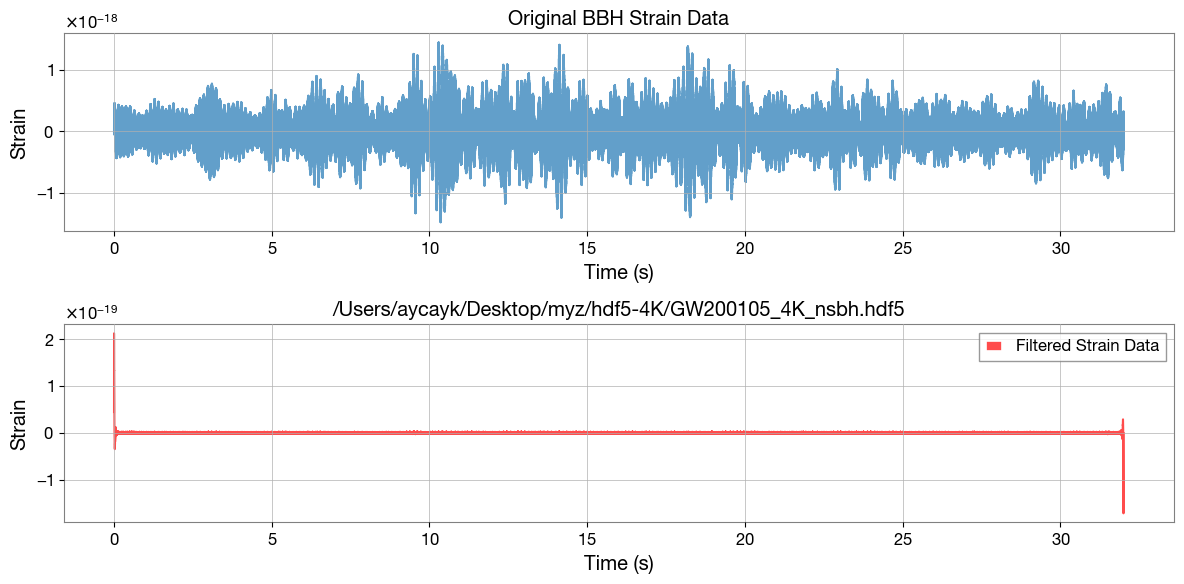

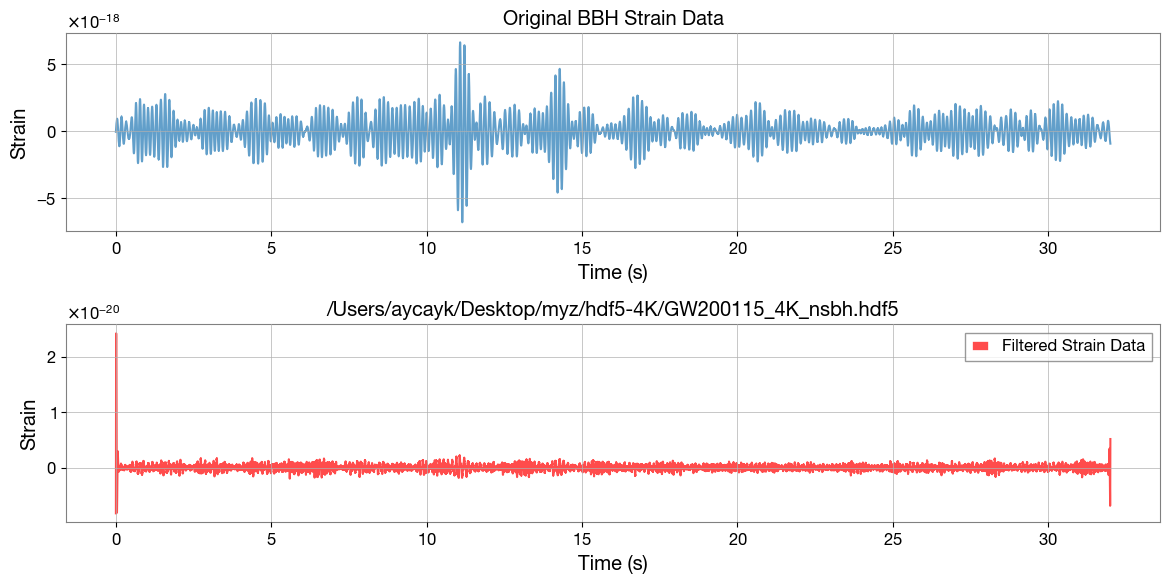

In [ ]:
sampling_frequency = 4096  # Hz
duration = 32  # seconds
time = np.linspace(0, duration, int(sampling_frequency * duration))


for file_path in file_paths:
    with h5py.File(file_path, 'r') as hdf:
        metadata = {key: hdf['meta'][key][()] for key in hdf['meta']}    
        strain = hdf['strain']['Strain'][:]

    # Bandpass filter 
    def bandpass_filter(data, lowcut, highcut, fs, order=4):
        '''A bandpass filter is a tool that isolates a specific range of 
        frequencies from the input signal while removing (attenuating) frequencies 
        outside this range. It doesn't remove all noise but focuses on frequencies
        where the signal of interest (in this case, the gravitational wave) is most likely to be found.
        '''
        nyquist = 0.5 * fs
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
        y = filtfilt(b, a, data)
    
        return y


    # Define frequency range ( 20 Hz - 300 Hz)
    lowcut = 20
    highcut = 300

    filtered_strain = bandpass_filter(strain, lowcut, highcut, sampling_frequency)
    
    
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time, strain, label="Original Strain Data", alpha=0.7)
    plt.title("Original BBH Strain Data")
    plt.xlabel("Time (s)")
    plt.ylabel("Strain")

    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_strain, label="Filtered Strain Data", color='r', alpha=0.7)
    plt.title(f"{file_path}")
    plt.xlabel("Time (s)")
    plt.ylabel("Strain")

    plt.tight_layout()
    plt.legend()
    plt.show()